# **Discovering Disease Outbreaks from News Headlines**

Identifying and mapping epidemics is crucial to prevent or respond to deadly disease outbreaks. Your first assignment for the WHO is as follows:

- Extract the locations (city and/or country name) from each news headline.
- Find the geographic coordinates of each headline using the city/country.
- Cluster (group) the headlines based on the geographic location.
- Visualize the clusters on a map and analyze them for patterns indicating an epidemic.
- Investigate the largest clusters for signs of disease outbreaks.
- Review headlines in the largest clusters within the United States and around the world. If any disease outbreak is   particularly dominant, visualize all worldwide mentions of that disease.
- Provide a summary of your findings to your superiors at the WHO so they can direct resources.

Listed under the bullets are the Python libraries for the technique.

* Extracting city and country name data from text using regular expressions
    - **re**: text extraction with regular expressions
    
* Manipulating data and matching location names to geographic coordinates
    - **pandas**: data manipulation and analysis
    
* Clustering geographic coordinates with k-means and/or DBSCAN
    - **scikit-learn**: machine learning
    
* Visualizing clusters on a geographic map
    - **basemap**: geographic visualization
    
* Analyzing algorithm output and tuning model settings to improve result
* Sorting between clusters based on size and within clusters based on distance
    - **matplotlib**: general visualization
    
* Interpreting algorithm results in the problem domain
* Summarizing findings of a data science project effectively
    - **nbconvert**: converting Jupyter Notebooks to reports


The project is broken into five parts.

1. Extracting City and Country Information from News Headlines

2. Finding Geographic Locations of Headlines

3. Clustering Headlines Based on Location

4. Identifying Disease Outbreaks

5. Presenting the Disease Outbreak Data

The skills covered in order are the following: 
- text extraction
- data manipulation
- clustering
- interpreting algorithm outputs
- producing an actionable report. 

The deliverable from each part is a Jupyter notebook (uploaded to GitHub) documenting your workflow and results. 
The final executive summary will be a notebook converted to html or a PDF to share the conclusions with your superiors at the WHO. 
Each section builds upon the previous and will test your skills in a different area of data science. 

As you go through the project, keep in mind the **overall objective: to identify disease outbreaks around the world.** The project is representative of the problems solved by data scientists in industry or academia and utilizes the most popular tools for data science in Python.

**Dataset**

**[headlines.txt](https://livevideo-resources.s3-us-west-2.amazonaws.com/course-data/93/headlines.txt)** (Available in the GitHub repository)

This file contains a curated list of actual worldwide news headlines referring to diseases.

Each headline is on a separate line with a total of 650 headlines.
> Example headlines:
>
> - Zika spreads to Winter Park
> - Durango is infested with Hepatitis B
> - Mpika authorities confirmed the spread of Chikungunya
> - Gladstone Encounters Severe Symptoms of Dengue
> - Mad Cow Disease Hits London
> - Zika symptoms spotted in Quito 

The headlines in the dataset were synthetically created, but the dataset’s distribution of disease and location-mentions is modeled on real health mentions in news articles over the first few months of 2016. These articles were detected by matching health keywords within international sections of popular online news sources. Such sections are commonly demarcated by continent or country within the news source’s URL. For instance, https://cnn.com/africa contains English-language news coverage from Africa, while https://reuters.com/places/thailand contains English-language news coverage from Thailand. Article content ranges from local politics to newsworthy health incidents.

We matched health terms in the body and headline of the articles to find the health-related articles. Inclusion of the body text would have added surplus noise to our analysis and all mentions of location-specific diseases have been transformed into simple, single-line article titles. About half of the headlines originated in the United States, which might necessitate splitting the data into two categories: The United States and the rest of the world.


# Parsing the News Headlines

### **Objective**

Find any city and/or country names mentioned in each of the news headlines.

### **Workflow**

1. Load in the headline data and examine it for any data quality issues.
1. Use any library/data structure to read in the headlines
1. Read through some of the headlines and identify potential problems
1. Using regular expressions and the cities and countries within the geonamescache library, match any cities/countries within each headline.
1. Make sure to normalize headlines and city/country names by removing accent marks. This can be done with the unidecode library.
1. Watch out for multiple cities in a headline and matches on short words! We want the match to be on the entire city—for example San Marino—and not a partial match—San.
1. Put the extracted data into a pandas DataFrame with three columns: headline, city, country.
1. Make sure there were no issues with the extraction by sampling some of the headlines and examining the city and country names.
1. One method for finding problems is to look for the most common names and see if there are any issues.
1. Once you are confident you’ve found all the cities/countries in each headline, save the DataFrame for the next part.

### **Importance to project**

* We can’t do much with just the headlines; although they contain the city/country names, they do not contain the geographic information—latitude and longitude—we need to find clusters of disease outbreaks. The first step in getting the geographic information is to isolate the names.

* Later, we will use the names to find the location of each headline, which requires bringing in external data (through geonamescache).

* This workflow is common in data science. First, we separate the useful information from the noise—data mining—and then we augment it with external data—data engineering.

## Regular expressions

Here’s a program with a regular expression that counts how many lines in a text file contain the word hello. A line that contains hello more than once is counted only once:

```python
import re
regexp = re.compile("hello")
count = 0
file = open("headlines.txt", 'r')
for line in file.readlines():
    if regexp.search(line):
        count = count + 1
file.close()
print(count)
```

The program starts by importing the Python regular expression module, called `re`. Then it takes the text string `"hello"` as a textual regular expression and compiles it into a compiled regular expression, using the `re.compile` function. This compilation isn’t strictly necessary, but compiled regular expressions can significantly increase a program’s speed, so they’re almost always used in programs that process large amounts of text.

What can the regex compiled from `"hello"` be used for? You can use it to recognize other instances of the word `"hello"` within another string; in other words, you can use it to determine whether another string contains `"hello"` as a substring. This task is accomplished by the search method, which returns `None` if the regular expression isn’t found in the string argument; Python interprets `None` as `false` in a Boolean context. If the regular expression is found in the string, Python returns a special object that you can use to determine various things about the match (such as where in the string it occurred). I discuss this topic later.

### **Regular expressions with special characters**

The previous example has a small flaw: It counts how many lines contain "hello" but ignores lines that contain "Hello" because it doesn’t take capitalization into account.

One way to solve this problem would be to use two regular expressions—one for "hello" and one for "Hello"—and test each against every line. A better way is to use the more advanced features of regular expressions. For the second line in the program, substitute

```python
regexp = re.compile("hello|Hello")
```

This regular expression uses the vertical-bar special character |. A special character is a character in a regex that isn’t interpreted as itself; it has some special meaning. | means or, so the regular expression matches "hello" or "Hello".

Another way of solving this problem is to use

```python
regexp = re.compile("(h|H)ello")
```
In addition to using |, this regular expression uses the parentheses special characters to group things, which in this case means that the | chooses between a small or capital H. The resulting regex matches either an h or an H, followed by ello.

Another way to perform the match is


```python
regexp = re.compile("[hH]ello")
```

The special characters [ and ] take a string of characters between them and match any single character in that string. There’s a special shorthand to denote ranges of characters in [ and ]; [a-z] match a single character between a and z, [0-9A-Z] match any digit or any uppercase character, and so forth. Sometimes, you may want to include a real hyphen in the [], in which case you should put it as the first character to avoid defining a range; [-012] match a hyphen, a 0, a 1, or a 2, and nothing else.

Quite a few special characters are available in Python regular expressions, and describing all of the subtleties of using them in regular expressions is beyond the scope of this book. A complete list of the special characters available in Python regular expressions, as well as descriptions of what they mean, is in the online documentation of the regular expression re module in the standard library. For the remainder of this chapter, I describe the special characters I use as they appear.

                                                                                                                 
>**QUICK CHECK: SPECIAL CHARACTERS IN REGULAR EXPRESSIONS**                                              
> * What regular expression would you use to match strings that represent the numbers -5 through 5?                  
>                                                                                                                 
> * What regular expression would you use to match a hexadecimal digit? Assume that allowed hexadecimal digits are  
>      1, 2, 3, > > 4, 5, 6, 7, 8, 9, 0, A, a, B, b, C, c, D, d, E, e, F, and f.                                     
 

### **Regular expressions and raw strings**

The functions that compile regular expressions, or search for matches to regular expressions, understand that certain character sequences in strings have special meanings in the context of regular expressions. regex functions understand that \n represents a newline character, for example. But if you use normal Python strings as regular expressions, the regex functions typically never see such special sequences, because many of these sequences also possess a special meaning in normal strings. \n, for example, also means newline in the context of a normal Python string, and Python automatically replaces the string sequence \n with a newline character before the regex function ever sees that sequence. The regex function, as a result, compiles strings with embedded newline characters—not with embedded \n sequences.

In the case of \n, this situation makes no difference because regex functions interpret a newline character as exactly that and do the expected thing: attempt to match the character with another newline character in the text being searched.

Now look at another special sequence, \\, which represents a single backslash to regular expressions. Assume that you want to search text for an occurrence of the string "\ten". Because you know that you have to represent a backslash as a double backslash, you might try
```python
regexp = re.compile("\\ten")
```
This example compiles without complaining, but it’s wrong. The problem is that \\ also means a single backslash in Python strings. Before re.compile is invoked, Python interprets the string you typed as meaning \ten, which is what is passed to re.compile. In the context of regular expressions, \t means tab, so your compiled regular expression searches for a tab character followed by the two characters en.

To fix this problem while using regular Python strings, you need four backslashes. Python interprets the first two backslashes as a special sequence representing a single backslash, and likewise for the second pair of backslashes, resulting in two actual backslashes in the Python string. Then that string is passed in to re.compile, which interprets the two actual backslashes as a regex special sequence representing a single backslash. Your code looks like this:

```python
regexp = re.compile("\\\\ten")
```
That seems confusing, and it’s why Python has a way of defining strings that doesn’t apply the normal Python rules to special characters. Strings defined this way are called raw strings.

Raw strings to the rescue
A raw string looks similar to a normal string except that it has a leading r character immediately preceding the initial quotation mark of the string. Here are some raw strings:

```python
r"Hello"
r"""\tTo be\n\tor not to be"""
r'Goodbye'
r'''12345'''
```

As you can see, you can use raw strings with either the single or double quotation marks and with the regular or triple-quoting convention. You can also use a leading R instead of r if you want to. No matter how you do it, raw-string notation can be taken as an instruction to Python saying “Don’t process special sequences in this string.” In the previous examples, all the raw strings are equivalent to their normal string counterparts except the second example, in which the \t and \n sequences aren’t interpreted as tabs or newlines but are left as two-string character sequences beginning with a backslash.

Raw strings aren’t different types of strings. They represent a different way of defining strings. It’s easy to see what’s happening by running a few examples interactively:

```python
>>> r"Hello" == "Hello"
True
>>> r"\the" == "\\the"
True
>>> r"\the" == "\the"
False
>>> print(r"\the")
\the
>>> print("\the")
        he
```

Using raw strings with regular expressions means that you don’t need to worry about any funny interactions between string special sequences and regex special sequences. You use the regex special sequences. Then the previous regex example becomes

```python
regexp = re.compile(r"\\ten")
```
which works as expected. The compiled regex looks for a single backslash followed by the letters ten.

You should get into the habit of using raw strings whenever defining regular expressions, and you’ll do so for the remainder of this chapter.

### **Extracting matched text from strings**

One of the most common uses of regular expressions is to perform simple pattern-based parsing on text. This task is something you should know how to do, and it’s also a good way to learn more regex special characters.

Assume that you have a list of people and phone numbers in a text file. Each line of the file looks like this:

```python
surname, firstname middlename: phonenumber
```
You have a surname followed by a comma and space, followed by a first name, followed by a space, followed by a middle name, followed by colon and a space, followed by a phone number.

But to make things complicated, a middle name may not exist, and a phone number may not have an area code. (It might be 800-123-4567 or 123-4567.) You could write code to explicitly parse data out from such a line, but that job would be tedious and error-prone. Regular expressions provide a simpler answer.

Start by coming up with a regex that matches lines of the given form. The next few paragraphs throw quite a few special characters at you. Don’t worry if you don’t get them all on the first read; as long as you understand the gist of things, that’s all right.

For simplicity’s sake, assume that first names, surnames, and middle names consist of letters and possibly hyphens. You can use the [] special characters discussed in the previous section to define a pattern that defines only name characters:

```python
[-a-zA-z]
```
This pattern matches a single hyphen, a single lowercase letter, or a single uppercase letter.

To match a full name (such as McDonald), you need to repeat this pattern. The + metacharacter repeats whatever comes before it one or more times as necessary to match the string being processed. So the pattern

```python
[-a-zA-Z]+
```

matches a single name, such as Kenneth or McDonald or Perkin-Elmer. It also matches some strings that aren’t names, such as --- or -a-b-c-, but that’s all right for purposes of this example.

Now, what about the phone number? The special sequence \d matches any digit, and a hyphen outside [] is a normal hyphen. A good pattern to match the phone number is

```python
\d\d\d-\d\d\d-\d\d\d\d
```
That’s three digits followed by a hyphen, followed by three digits, followed by a hyphen, followed by four digits. This pattern matches only phone numbers with an area code, and your list may contain numbers that don’t have one. The best solution is to enclose the area-code part of the pattern in (); group it; and follow that group with a ? special character, which says that the thing coming immediately before the ? is optional:

```python
(\d\d\d-)?\d\d\d-\d\d\d\d
```
This pattern matches a phone number that may or may not contain an area code. You can use the same sort of trick to account for the fact that some of the people in your list have middle names (or initials) included and others don’t. (To do so, make the middle name optional by using grouping and the ? special character.)

You can also use {} to indicate the number of times that a pattern should repeat, so for the phone-number examples above, you could use:

```python
(\d{3}-)?\d{3}-\d{4}
```
This pattern also means an optional group of three digits plus a hyphen, three digits followed by a hyphen, and then four digits.

Commas, colons, and spaces don’t have any special meanings in regular expressions; they mean themselves.

Putting everything together, you come up with a pattern that looks like this:

```python
[-a-zA-Z]+, [-a-zA-Z]+( [-a-zA-Z]+)?: (\d{3}-)?\d{3}-\d{4}
```
A real pattern probably would be a bit more complex, because you wouldn’t assume that there’s exactly one space after the comma, exactly one space after the first and middle names, and exactly one space after the colon. But that’s easy to add later.

The problem is that, whereas the above pattern lets you check to see whether a line has the anticipated format, you can’t extract any data yet. All you can do is write a program like this:

```python
import re
regexp = re.compile(r"[-a-zA-Z]+,"
                    r" [-a-zA-Z]+"
                    r"( [-a-zA-Z]+)?"
                    r": (\d{3}-)?\d{3}-\d{4}"
                   )
file = open("textfile", 'r')
for line in file.readlines():
    if regexp.search(line):
        print("Yeah, I found a line with a name and number. So what?")
file.close()
```
Notice that you’ve split your regex pattern, using the fact that Python implicitly concatenates any set of strings separated by whitespace. As your pattern grows, this technique can be a great aid in keeping the pattern maintainable and understandable. It also solves the problem with the line length possibly increasing beyond the right edge of the screen.

Fortunately, you can use regular expressions to extract data from patterns, as well as to see whether the patterns exist. The first step is to group each subpattern corresponding to a piece of data you want to extract by using the () special characters. Then give each subpattern a unique name with the special sequence ?P<name>, like this:

```python
(?P<last>[-a-zA-Z]+), (?P<first>[-a-zA-Z]+)( (?P<middle>([-a-zA-Z]+)))?:
(?P<phone>(\d{3}-)?\d{3}-\d{4}
```
(Please note that you should enter these lines as a single line, with no line breaks. Due to space constraints, the code can’t be represented here in that manner.)

There’s an obvious point of confusion here: The question marks in ?P<...> and the question-mark special characters indicating that the middle name and area code are optional have nothing to do with one another. It’s an unfortunate semi-coincidence that they happen to be the same character.

Now that you’ve named the elements of the pattern, you can extract the matches for those elements by using the group method. You can do so because when the search function returns a successful match, it doesn’t return just a truth value; it also returns a data structure that records what was matched. You can write a simple program to extract names and phone numbers from your list and print them out again, as follows:

```python
import re
regexp = re.compile(r"(?P<last>[-a-zA-Z]+),"
                    r" (?P<first>[-a-zA-Z]+)"
                    r"( (?P<middle>([-a-zA-Z]+)))?"
                    r": (?P<phone>(\(\d{3}-)?\d{3}-\d{4})"
                   )
file = open("textfile", 'r')
for line in file.readlines():
    result = regexp.search(line)
    if result == None:
        print("Oops, I don't think this is a record")
    else:
        lastname = result.group('last')
        firstname = result.group('first')
        middlename = result.group('middle')
        if middlename == None:
                  middlename = ""
        phonenumber = result.group('phone')
    print('Name:', firstname, middlename, lastname,' Number:', phonenumber)
file.close()
```

### ***There are some points of interest here:***

You can find out whether a match succeeded by checking the value returned by search. If the value is None, the match failed; otherwise, the match succeeded, and you can extract information from the object returned by search.
group is used to extract whatever data matched your named subpatterns. You pass in the name of the subpattern you’re interested in.

Because the middle subpattern is optional, you can’t count on it to have a value, even if the match as a whole is successful. If the match succeeds, but the match for the middle name doesn’t, using group to access the data associated with the middle subpattern returns the value None.

Part of the phone number is optional, but part isn’t. If the match succeeds, the phone subpattern must have some associated text, so you don’t have to worry about it having a value of None.

> ***TRY THIS: EXTRACTING MATCHED TEXT***
> 
> Making international calls usually requires a + and the country code. Assuming that the country code is two digits, how 
>
> would you modify the code above to extract the + and the country code as part of the number? (Again, not all numbers have a country code.) How would you make the code handle country codes of one to three digits?

### **Substituting text with regular expressions**

In addition to extracting strings from text, you can use Python’s regex module to find strings in text and substitute other strings in place of those that were found. You accomplish this task by using the regular substitution method sub. The following example replaces instances of "the the" (presumably, a typo) with single instances of "the":

```python
>>> import re
>>> string = "If the the problem is textual, use the the re module"
>>> pattern = r"the the"
>>> regexp = re.compile(pattern)
>>> regexp.sub("the", string)
'If the problem is textual, use the re module'
```
The sub method uses the invoking regex (regexp, in this case) to scan its second argument (string, in the example) and produces a new string by replacing all matching substrings with the value of the first argument ("the", in this example).

But what if you want to replace the matched substrings with new ones that reflect the value of those that matched? This is where the elegance of Python comes into play. The first argument to sub—the replacement substring, "the" in the example—doesn’t have to be a string at all. Instead, it can be a function. If it’s a function, Python calls it with the current match object; then it lets that function compute and return a replacement string.

To see this function in action, build an example that takes a string containing integer values (no decimal point or decimal part) and returns a string with the same numerical values but as floating numbers (with a trailing decimal point and zero):

```python
>>> import re
>>> int_string = "1 2 3 4 5"
>>> def int_match_to_float(match_obj):
...     return(match_obj.group('num') + ".0")
...
>>> pattern = r"(?P<num>[0-9]+)"
>>> regexp = re.compile(pattern)
>>> regexp.sub(int_match_to_float, int_string)
'1.0 2.0 3.0 4.0 5.0'
```

In this case, the pattern looks for a number consisting of one or more digits (the [0-9]+ part). But it’s also given a name (the ?P<num>... part) so that the replacement string function can extract any matched substring by referring to that name. Then the sub method scans down the argument string "1 2 3 4 5", looking for anything that matches [0-9]+. When sub finds a substring that matches, it makes a match object defining exactly which substring matched the pattern, and it calls the int_match_to_float function with that match object as the sole argument. int_match_to_float uses group to extract the matching substring from the match object (by referring to the group name num) and produces a new string by concatenating the matched substring with a ".0". sub returns the new string and incorporates it as a substring into the overall result. Finally, sub starts scanning again right after the place where it found the last matching substring, and it keeps going like that until it can’t find any more matching substrings.

> ***TRY THIS: REPLACING TEXT***
> In the checkpoint in section 16.4, you extended a phone-number regular expression to also recognize a country code. How would you use a function to make any numbers that didn’t have a country code now have +1 (the country code for the United States and Canada)?

## **LAB 16: PHONE-NUMBER NORMALIZER**

In the United States and Canada, phone numbers consist of ten digits, usually separated into a three-digit area code, a three-digit exchange code, and a four-digit station code. As mentioned in section 16.4, they may or may not be preceded by +1, the country code. In practice, however, you have many ways to format a phone number, such as (NNN) NNN-NNNN, NNN-NNN-NNNN, NNN NNN-NNNN, NNN.NNN.NNNN, and NNN NNN NNNN, to name a few. Also, the country code may not be present, may not have a +, and usually (not always) is separated from the number by a space or dash. Whew!

In this lab, your task is to create a phone-number normalizer that takes any of the formats and returns a normalized phone number 1-NNN-NNN-NNNN.

The following are all possible phone numbers:

* +1 223-456-7890	1-223-456-7890	+1 223 456-7890
* (223) 456-7890	1 223 456 7890	223.456.7890

### **Bonus:** 

The first digit of the area code and the exchange code can only be 2-9, and the second digit of an area code can’t be 9. Use this information to validate the input and return a ValueError exception of invalid phone number if the number is invalid.

### **Summary**

For a complete list and explanation of the regex special characters, refer to the Python documentation.
In addition to the search and sub methods, many other methods can be used to split strings, extract more information from match objects, look for the positions of substrings in the main argument string, and precisely control the iteration of a regex search over an argument string.
Besides the \d special sequence, which can be used to indicate a digit character, many other special sequences are listed in the documentation.
There are also regex flags, which you can use to control some of the more esoteric aspects of how extremely sophisticated matches are carried out.

### **Matching Location Names in Text**

Data scientists frequently analyze text for patterns. Python offers a simple syntax for carrying out such string matching analyses. In Python, we can easily determine if one string is a substring of another, or if the start of a string contains some predefined text.

This listing Basic string matching
```python
assert 'Boston' in 'Boston Marathon'
assert 'Boston Marathon'.startswith('Boston')
assert 'Boston Marathon'.endswith('Boston') == False
```
Nevertheless, in more complex analyses, Python’s basic string syntax can be quite limiting. For example, there is no direct string method for executing case-insensitive substring comparison. Furthermore, Python’s string methods can’t directly distinguish between sub-characters in a string and sub-phrases in a sentence. So if we wish to determine if the phrase 'in a' is present in a sentence, then we cannot safely rely on basic matching. Otherwise, we the run the risk of incorrectly matching character sequences such as 'sin apple' or 'win attached'.

This listing Basic sub-string matching errors
```python
assert 'in a' in 'sin apple'
assert 'in a' in 'win attached'
```
To overcame these limitations, we must rely on Python’s built-in regular expression processing library, re. A regular expression (or regex for short) is a string-encoded pattern that can be compared against some text. Coded regex patterns range from simple string copies to incredibly complex formulations that very few people can decipher. In this section, we will only focus on simple regex composition and matching.

Most regex-matching in Python can be executed with the re.search function. The function takes 2 inputs; a regex pattern, and also the text against which the pattern will be matched. It returns a Match object if a match is found, and a None otherwise. The Match object contains start method and an end method. These methods will return the start-index and the end-index of the matched string in the text.

This listing String matching using regexes

```python
import re
regex = 'Boston'
random_text = 'Clown Patty'
match = re.search(regex, random_text)
assert match is None

matchable_text = 'Boston Marathon'
match = re.search(regex, matchable_text)
assert match is not None
start, end = match.start(), match.end()
matched_string = matchable_text[start: end]
assert matched_string == 'Boston'
```
Additionally, case-insensitive string matching is a breeze with re.search. We simply pass re.IGNORECASE as an added flags parameter.

This listing Case-insensitive matching using regexes

```python
for text in ['BOSTON', 'boston', 'BoSTOn']:
    assert re.search(regex, text, flags=re.IGNORECASE) is not None
```
Also, regexes permit us to match exact words, and not just substrings, using word boundary detection. The addition of the \b pattern to a regex string will capture the start and end points of words (as defined by whitespaces and punctuation). However, because the backslash is a special character in the standard Python lexicon, we must take measures to ensure the backslash is interpreted like a regular raw character. We do this by either adding another backslash to the backslash, (a rather cumbersome approach) or by preceding the string with an r literal. The later solution guarantees that the input regex get treated as a raw string during analysis.

This listing Word boundary matching using regexes

```python
for regex in ['\\bin a\\b', r'\bin a\b']:
    for text in ['sin apple', 'win attached']:
        assert re.search(regex, text) is None

    text = 'Match in a string'
    assert re.search(regex, text) is not None
```

Now, let us carry out a more complicated match. We’ll match against the sentence f’I visited {city} yesterday, where {city} represents one of 3 possible locations; 'Boston', 'Philadelphia', or 'San Francisco'. The correct regex syntax for executing the match is r’I visited \b(Boston|Philadelphia|San Francisco)\b yesterday'.

> **NOTE**
> The pipe | is an Or condition. It requires the regex to match from one of the 3 cities in our list. Furthermore, the parentheses limit the scope of the matched cities. Without them, the matched text-range would stretch beyond 'San Francisco', all the way to 'San Francisco yesterday'.

This listing Multi-city matching using regexes
```python
regex = r'I visited \b(Boston|Philadelphia|San Francisco)\b yesterday.'
assert re.search(regex, 'I visited Chicago yesterday.') is None
```

```python
cities = ['Boston', 'Philadelphia', 'San Francisco']
for city in cities:
    assert re.search(regex, f'I visited {city} yesterday.') is not None
```
On a final note, lets discuss how to run a regex search efficiently. Suppose we want to match a regex against 100 strings. For every match, re.search will transform the regex into Python PatternObject. Each such transformation is computationally costly. We’re better off executing the transformation only once using re.compile. Afterwards, we can leverage the compiled object’s built-in search function while avoiding any additional compilation.

> **NOTE**
> If we intend to use the compiled pattern for case-independent matching, then we must pass flags=re.IGNORECASE into re.compile.

```python
This listing String matching using compiled regexes
compiled_re = re.compile(regex)
text = 'I visited Boston yesterday.'
for i in range(1000):
    assert compiled_re.search(text) is not None
```

### **COMMON REGEX MATCHING TECHNIQUES.**

```python 
match = re.search(regex, text) # Returns a Match object if regex is present in text, and None otherwise.

match = re.search(regex, text, flags=re.IGNORECASE) # Returns a Match object if regex is present in text, and None otherwise. Matching is carried out independent of case.

match.start() # Returns the start index of a regex matched to an input text.

match.end() # Returns an end index of a regex matched to an input text.

compiled_regex = re.compile(regex) # Transforms the regex string a compiled pattern-matching matching object.

match = compiled_regex.search(text) # We leverage the compiled object’s built-in search method to match a regex against text.

re.compile('Boston') # Compiles a regex to match the string 'Boston' against the text.

re.compile('Boston', flags=re.IGNORECASE) # Compiles a regex to match the string Boston against the text. The matching will be independent of text-case.

re.compile('\\bBoston\\b') # Compiles a regex to match the word Boston against the text. Word boundaries will be used to execute an exact word match.

re.compile(r'\bBoston\b') # Compiles a regex to match the word Boston against the text. The inputted regex is treated as raw string, because of the r literal. Thus, we don’t need to add additional backslashes to our \b word boundary delimiters.

re.compile(r'\b(Boston|Chicago)\b') # Compiles a regex to match either the word Boston or the word Chicago to the text.
```

Regex-matching allows us to find location names text. Thus, the re module will prove invaluable to solving Case Study Three.


## **Submit Your Work**

The deliverable is a Jupyter Notebook documenting your workflow as you take the headlines.txt file, extract the city/country names, and put the results into a pandas DataFrame. This DataFrame will allow us to quickly perform analysis on the headlines and geographic data that we will find in the next part. An example of the structure and content of the expected DataFrame is below:
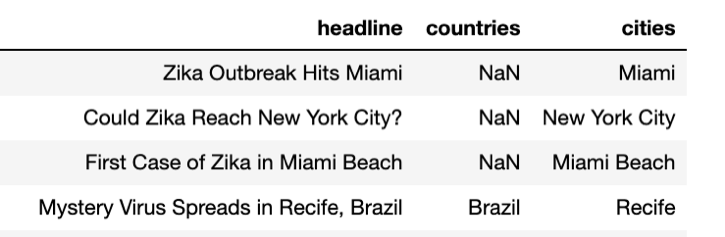

Upload a link to your Jupyter Notebook (preferably hosted on GitHub) in the blank below and hit submit. After submitting, you can view an example solution in the next section.

# Adding Latitude and Longitude Coordinates

### **Objective**

Find the geographic location of each headline in latitude and longitude coordinates from the city/country names.
### **Workflow**

1. Load in the pandas DataFrame with headline, countries, and cities.
1. If a headline contains multiple cities/countries, decide which single one to keep.
4. For each city/country, match the name to the latitude and longitude in geonamescache.
4. You can use the function gc.get_cities_by_names_ _(“city_name”).
4. Some cities will return multiple matches with the previous function in different countries. You’ll have to decide which city to keep based on a heuristic (rule of thumb).
4. If you have trouble, work with a single problematic city until you figure it out, then write a function to apply on all headlines.
4. Add longitude and latitude coordinates to your DataFrame for each headline.
4. It will be helpful to get the countrycode of each headline at this point.
4. If you were not able to find many countries, think about dropping the column. You also need to decide what to do with headlines that have no coordinates.
4. You should end up with over 600 headlines that have geographic coordinates.

### **Importance to project**

In this section, we are augmenting the original data with external information. Our hypothesis is that there may be groups of headlines in close proximity referring to similar diseases. We will use the locations from this part to test our hypothesis by clustering headlines in the next part.

If we just searched the headlines for diseases, we might find repeated but geographically unrelated (not close to each other) mentions. These could lead to false positives that are only isolated cases.

### **Notes**

Make sure you are inspecting your data statistically and visually at each step. Compute summary statistics and make basic distribution plots (histograms) to search for anomalies.
When you find issues (we all make mistakes), go back and correct them. You may find yourself repeatedly carrying out data cleaning operations; this is normal for a data science project!

Keep in mind that the more accurate the geographic locations of the headlines, the better will be the clustering and the overall conclusions. Checking your data one more time is worth it when lives are at stake.

## Python and Pandas

### **Python’s advantages for exploring data**

Python has become one of the leading languages for data science and continues to grow in that area. As I’ve mentioned, however, Python isn’t always the fastest language in terms of raw performance. Conversely, some data-crunching libraries, such as NumPy, are largely written in C and heavily optimized to the point that speed isn’t an issue. In addition, considerations such as readability and accessibility often outweigh pure speed; minimizing the amount of developer time needed is often more important. Python is readable and accessible, and both on its own and in combination with tools developed in the Python community, it’s an enormously powerful tool for manipulating and exploring data.

### **Python can be better than a spreadsheet**

Spreadsheets have been the tools of choice for ad-hoc data manipulation for decades. People who are skilled with spreadsheets can make them do truly impressive tricks: spreadsheets can combine different but related data sets, pivot tables, use lookup tables to link data sets, and much more. But although people everywhere get a vast amount of work done with them every day, spreadsheets do have limitations, and Python can help you go beyond those limitations.

One limitation that I’ve already alluded to is the fact that most spreadsheet software has a row limit—currently, about 1 million rows, which isn’t enough for many data sets. Another limitation is the central metaphor of the spreadsheet itself. Spreadsheets are two-dimensional grids, rows and columns, or at best stacks of grids, which limits the ways you can manipulate and think about complex data.

With Python, you can code your way around the limitations of spreadsheets and manipulate data the way you want. You can combine Python data structures such as lists, tuples, sets, and dictionaries in endlessly flexible ways, or you can create your own classes to package both data and behavior exactly the way you need.

### **Jupyter notebook**

Probably one of the most compelling tools for exploring data with Python doesn’t augment what the language itself does, but changes the way you use the language to interact with your data. Jupyter notebook is a web application that allows you to create and share documents that contain live code, equations, visualizations, and explanatory text. Although several other languages are now supported, it originated in connection with IPython, an alternative shell for Python developed by the scientific community.

What makes Jupyter such a convenient and powerful tool is the fact that you interact with it in a web browser. It lets you combine text and code, as well as modify and execute your code interactively. You can not only run and modify code in chunks, but also save and share the notebooks with others.

The best way to get a feel for what Jupyter notebook can do is start playing with it. It’s fairly easy to run a Jupyter process locally on your machine, or you can access online versions. For some options, see the sidebar on ways to run Jupyter.

### ***WAYS TO RUN JUPYTER***

**Jupyter online**: Accessing online instances of Jupyter is one of the easiest ways to get started. Currently, Project Jupyter, the community behind Jupyter, hosts free notebooks at https://jupyter.org/try. You can also find demo notebooks and kernels for other languages. At this writing, you can also access free notebooks on Microsoft’s Azure platform at https://notebooks.azure.com, and many other ways are available.

**Jupyter locally:** Although using an online instance is quite convenient, it’s not very much work to set up your own instance of Jupyter on your computer. Usually for local versions, you point your browser to localhost:8888.

If you use Docker, you have several containers to choose among. To run the data science notebook container, use something like this:

```bash
docker run -it --rm -p 8888:8888 jupyter/datascience-notebook
```
If you’d rather run directly on your system, it’s easy to install and run Jupyter in a virtualenv.

macOS and Linux systems: First, open a command window, and enter the following commands:

```bash
> python3 -m venv jupyter
 > cd jupyter
 > source bin/activate
 > pip install jupyter
 > jupyter-notebook
 ```
 
 Windows systems:
 ```bash
> python3 -m venv jupyter
 > cd jupyter
 > Scripts/bin/activate
 > pip install jupyter
 > Scripts/jupyter-notebook
 ```
 The last command should run the Jupyter notebook web app and open a browser window pointing at it.
 
 Starting a kernel
When you have Jupyter installed, running, and open in your browser, you need to start a Python kernel. One nice thing about Jupyter is that it lets you run multiple kernels at the same time. You can run kernels for different versions of Python and for other languages such as R, Julia, and even Ruby.

Starting a kernel is easy. Just click the new button and select Python 3 [this figure](https://livebook.manning.com//book/the-quick-python-book-third-edition/chapter-24/ch24fig01).

### **Executing code in a cell**

When you have a kernel running, you can start entering and running Python code. Right away, you’ll notice a few differences from the ordinary Python command shell. You won’t get the >>> prompt that you see in the standard Python shell, and pressing Enter just adds new lines in the cell. To execute the code in a cell, illustrated in this figure, choose Cell > Run Cells, click the Run button immediately to the left of the down arrow on the button bar, or use the key combination Alt-Enter. After you use Jupyter notebook a little bit, it’s quite likely that the Alt-Enter key combination will become quite natural to you.


>***TRY THIS: USING JUPYTER NOTEBOOK***

>Enter some code in the notebook and experiment with running it. Check out the Edit, Cell, and Kernel menus to see what >options are there. When you have a little code running, use the Kernel menu to restart the kernel, repeat your steps, and then use the Cell menu to rerun the code in all of the cells.

### **Python and pandas**

In the course of exploring and manipulating data, you perform quite a few common operations, such as loading data into a list or dictionary, cleaning data, and filtering data. Most of these operations are repeated often, have to be done in standard patterns, and are simple and often tedious. If you think that this combination is a strong reason to automate those tasks you’re not alone. One of the now-standard tools for handling data in Python—pandas—was created to automate the boring heavy lifting of handling data sets.

### **Why you might want to use pandas**

pandas was created to make manipulating and analyzing tablular or relational data easy by providing a standard framework for holding the data, with convenient tools for frequent operations. As a result, it’s almost more of an extension to Python than a library, and it changes the way you can interact with data. The plus side is that after you grok how pandas work, you can do some impressive things and save a lot of time. It does take time to learn how to get the most from pandas, however. As with many tools, if you use pandas for what it was designed for, it excels. The simple examples I show you in the following sections should give you a rough idea whether pandas is a tool that’s suited for your use cases.

### **Installing pandas**

pandas is easy to install with pip. It’s often used along with matplotlib for plotting, so you can install both tools from the command line of your Jupyter virtual environment with this code:
```bash
> pip install pandas matplotlib
```
From a cell in a Jupyter notebook, you can use
```python
> !pip install pandas matplotlib
```

If you use pandas, life will be easier if you use the following three lines:
```python
%matplotlib inline
import pandas as pd
import numpy as np
```
The first line is a Jupyter “magic” function that enables matplotlib to plot data in the cell where your code is (which is very useful). The second line imports pandas with the alias of pd, which is both easier to type and common among pandas users; the last line also imports numpy. Although pandas depends quite a bit on numpy, you won’t use it explicitly in the following examples, but it’s reasonable to get into the habit of importing it anyway.

### **Data frames**

One basic structure that you get with pandas is a data frame. A data frame is a two-dimensional grid, rather similar to a relational database table except in memory. Creating a data frame is easy; you give it some data. To keep things absolutely simple, give it a 3 × 3 grid of numbers as the first example. In Python, such a grid is a list of lists:
```python
grid = [[1,2,3], [4,5,6], [7,8,9]]
print(grid)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]
```
Sadly, in Python the grid won’t look like a grid unless you make some additional effort. So see what you can do with the same grid as a pandas data frame:
```python
import pandas as pd
df = pd.DataFrame(grid)
print(df)

   0  1  2
0  1  2  3
1  4  5  6
2  7  8  9
```
That code is fairly straightforward; all you needed to do was turn your grid into a data frame. You’ve gained a more gridlike display, and now you have both row and column numbers. It’s often rather bothersome to keep track of what column number is what, of course, so give your columns names:
```python
df = pd.DataFrame(grid, columns=["one", "two", "three"] )
print(df)

   one  two  three
0    1    2      3
1    4    5      6
2    7    8      9
```
You may wonder whether naming the columns has any benefit, but the column names can be put to use with another pandas trick: the ability to select columns by name. If you want the contents only of column "two", for example, you can get it very simply:
```python
print(df["two"])
0    2
1    5
2    8
Name: two, dtype: int64
```
Here, you’ve already saved time in comparison to Python. To get only column two of your grid, you’d need to use a list comprehension while also remembering to use a zero-based index (and you still wouldn’t get the nice output):
```python
print([x[1] for x in grid])
[2, 5, 8]
```
You can loop over data frame column values just as easily as the list you got by using a comprehension:
```python
for x in df["two"]:
    print(x)
2
5
8
```
That’s not bad for a start, but by using a list of columns in double brackets, you can do better, getting a subset of the data frame that’s another data frame. Instead of getting the middle column, get the first and last columns of your data frame as another data frame:
```python
edges = df[["one", "three"]]
print(edges)
   one  three
0    1      3
1    4      6
2    7      9
```
A data frame also has several methods that apply the same operation and argument to every item in the frame. If you want to add two to every item in the data frame’s edges, you could use the add() method:
```python
print(edges.add(2))
   one  three
0    3      5
1    6      8
2    9     11
```
Here again, it’s possible to get the same result by using list comprehensions and/or nested loops, but those techniques aren’t as convenient. It’s pretty easy to see how such functionality can make life easier, particularly for someone who’s more interested in the information that the data contains than in the process of manipulating it.

### **Data cleaning**

In earlier chapters, I discussed a few ways to use Python to clean data. Now that I’ve added pandas to the mix, I’ll show you examples of how to use its functionality to clean data. As I present the following operations, I also refer to ways that the same operation might be done in plain Python, both to illustrate how using pandas is different and to show why pandas isn’t right for every use case (or user, for that matter).

### **Loading and saving data with pandas**

pandas has an impressive collection of methods to load data from different sources. It supports several file formats (including fixed-width and delimited text files, spreadsheets, JSON, XML, and HTML), but it’s also possible to read from SQL databases, Google BiqQuery, HDF, and even clipboard data. You should be aware that many of these operations aren’t actually part of pandas itself; pandas relies on having other libraries installed to handle those operations, such as SQLAlchemy for reading from SQL databases. This distinction matters mostly if something goes wrong; quite often, the problem that needs to be fixed is outside pandas, and you’re left to deal with the underlying library.
```python
Reading a JSON file with the read_json() method is simple:

mars = pd.read_json("mars_data_01.json")
```
This code gives you a data frame like this:
```python
report
abs_humidity                         None
atmo_opacity                        Sunny
ls                                    296
max_temp                               -1
max_temp_fahrenheit                  30.2
min_temp                              -72
min_temp_fahrenheit                 -97.6
pressure                              869
pressure_string                    Higher
season                           Month 10
sol                                  1576
sunrise              2017-01-11T12:31:00Z
sunset               2017-01-12T00:46:00Z
terrestrial_date               2017-01-11
wind_direction                         --
wind_speed                           None
```
For another example of how simple reading data into pandas is, load some data from the CSV file of temperature data from chapter 21 and from the JSON file of Mars weather data used in this chapter. In the first case, use the read_csv() method:
```python
temp = pd.read_csv("temp_data_01.csv")

          4      5    6     7     8      9    10    11    12     13    14 \

0  1979/01/01  17.48  994   6.0  30.5   2.89  994 -13.6  15.8    NaN    0
1  1979/01/02   4.64  994  -6.4  15.8  -9.03  994 -23.6   6.6    NaN    0
2  1979/01/03  11.05  994  -0.7  24.7  -2.17  994 -18.3  12.9    NaN    0
3  1979/01/04   9.51  994   0.2  27.6  -0.43  994 -16.3  16.3    NaN    0
4  1979/05/15  68.42  994  61.0  75.1  51.30  994  43.3  57.0    NaN    0
5  1979/05/16  70.29  994  63.4  73.5  48.09  994  41.1  53.0    NaN    0
6  1979/05/17  75.34  994  64.0  80.5  50.84  994  44.3  55.7  82.60    2
7  1979/05/18  79.13  994  75.5  82.1  55.68  994  50.0  61.1  81.42  349
8  1979/05/19  74.94  994  66.9  83.1  58.59  994  50.9  63.2  82.87   78

     15    16      17
0   NaN   NaN  0.0000
1   NaN   NaN  0.0000
2   NaN   NaN  0.0000
3   NaN   NaN  0.0000
4   NaN   NaN  0.0000
5   NaN   NaN  0.0000
6  82.4  82.8  0.0020
7  80.2  83.4  0.3511
8  81.6  85.2  0.0785
```
Clearly, loading the file in a single step is appealing, and you can see that pandas had no issues loading the file. You can also see that the empty first column has been translated into NaN (not a number). You do still have the same issue with 'Missing' for some values, and in fact it might make sense to have those 'Missing' values converted to NaN:
```python
temp = pd.read_csv("temp_data_01.csv", na_values=['Missing'])
```
The addition of the na_values parameter controls what values will be translated to NaN on load. In this case, you added the string 'Missing' so that the row of the data frame was translated from
```python
NaN  Illinois  17  Jan 01, 1979  1979/01/01  17.48  994  6.0  30.5  2.89994
     -13.6  15.8  Missing  0  Missing  Missing  0.00%
```
to
```python
NaN  Illinois  17  Jan 01, 1979  1979/01/01  17.48  994  6.0  30.5  2.89994
     -13.6  15.8  NaN0  NaN  NaN  0.00%
```
This technique can be particularly useful if you have one of those data files in which, for whatever reason, “no data” is indicated in a variety of ways: NA, N/A, ?, -, and so on. To handle a case like that, you can inspect the data to find out what’s used and then reload it, using the na_values parameter to standardize all those variations as NaN.

### **Saving data**

If you want to save the contents of a data frame, a pandas data frame has a similarly broad collection of methods. If you take your simple grid data frame, you can write it in several ways. This line
```python
df.to_csv("df_out.csv", index=False)
```
writes a file that looks like this:
```python
one,two,three
1,2,3
4,5,6
7,8,9
```
Similarly, you can transform a data grid to a JSON object or write it to a file:
```python
df.to_json()
'{"one":{"0":1,"1":4,"2":7},"two":{"0":2,"1":5,"2":8},"three":{"0":3,"1":6,"2
     ":9}}'
```
### **Data cleaning with a data frame**

Converting a particular set of values to NaN on load is a very simple bit of data cleaning that pandas makes trivial. Going beyond that, data frames support several operations that can make data cleaning less of a chore. To see how this works, reopen the temperature CSV file, but this time, instead of using the headers to name the columns, use the range() function with the names parameter to give them numbers, which will make referring to them easier. You also may recall from an earlier example that the first field of every line—the "Notes" field—is empty and loaded with NaN values. Although you could ignore this column, it would be even easier if you didn’t have it. You can use the range() function again, this time starting from 1, to tell pandas to load all columns except the first one. But if you know that all of your values are from Illinois and you don’t care about the long-form date field, you could start from 4 to make things much more manageable:
```python
temp = pd.read_csv("temp_data_01.csv", na_values=['Missing'], header=0,
     names=range(18), usecols=range(4,18))
print(temp)

           4      5    6     7     8      9    10    11    12     13   14  \
0  1979/01/01  17.48  994   6.0  30.5   2.89  994 -13.6  15.8    NaN    0
1  1979/01/02   4.64  994  -6.4  15.8  -9.03  994 -23.6   6.6    NaN    0
2  1979/01/03  11.05  994  -0.7  24.7  -2.17  994 -18.3  12.9    NaN    0
3  1979/01/04   9.51  994   0.2  27.6  -0.43  994 -16.3  16.3    NaN    0
4  1979/05/15  68.42  994  61.0  75.1  51.30  994  43.3  57.0    NaN    0
5  1979/05/16  70.29  994  63.4  73.5  48.09  994  41.1  53.0    NaN    0
6  1979/05/17  75.34  994  64.0  80.5  50.84  994  44.3  55.7  82.60    2
7  1979/05/18  79.13  994  75.5  82.1  55.68  994  50.0  61.1  81.42  349
8  1979/05/19  74.94  994  66.9  83.1  58.59  994  50.9  63.2  82.87   78

     15    16      17
0   NaN   NaN   0.00%
1   NaN   NaN   0.00%
2   NaN   NaN   0.00%
3   NaN   NaN   0.00%
4   NaN   NaN   0.00%
5   NaN   NaN   0.00%
6  82.4  82.8   0.20%
7  80.2  83.4  35.11%
8  81.6  85.2   7.85%
```
Now you have a data frame that has only the columns you might want to work with. But you still have an issue: the last column, which lists the percentage of coverage for the heat index, is still a string ending with a percentage sign rather than an actual percentage. This problem is apparent if you look at the first row’s value for column 17:
```python
temp[17][0]
'0.00%'
```
To fix this problem, you need to do two things: Remove the % from the end of the value and then cast the value from string to a number. Optionally, if you want to represent the resulting percentage as a fraction, you need to divide it by 100. The first bit is simple because pandas lets you use a single command to repeat an operation on a column:
```python
temp[17] = temp[17].str.strip("%")
temp[17][0]
'0.00'
```
This code takes the column and calls a string strip() operation on it to remove the trailing %. Now when you look at the first value in the column (or any of the other values), you see that the offending percentage sign is gone. It’s also worth noting that you could have used other operations, such as replace("%", ""), to achieve the same result.

The second operation is to convert the string to a numeric value. Again, pandas lets you perform this operation with one command:
```python
temp[17] = pd.to_numeric(temp[17])
temp[17][0]
0.0
```
Now the values in column 17 are numeric, and if you want to, you can use the div() method to finish the job of turning those values into fractions:
```python
temp[17] = temp[17].div(100)
temp[17]

0    0.0000
1    0.0000
2    0.0000
3    0.0000
4    0.0000
5    0.0000
6    0.0020
7    0.3511
8    0.0785
Name: 17, dtype: float64
```
In fact, it would be possible to achieve the same result in a single line by chaining the three operations together:
```python
temp[17] = pd.to_numeric(temp[17].str.strip("%")).div(100)
```
This example is very simple, but it gives you an idea of the convenience that pandas can bring to cleaning your data. pandas has a wide variety of operations for transforming data, as well as the ability to use custom functions, so it would be hard to think of a scenario in which you couldn’t streamline data cleaning with pandas.

Although the number of options is almost overwhelming, a wide variety of tutorials and videos is available, and the documentation at http://pandas.pydata.org is excellent.

>***TRY THIS: CLEANING DATA WITH AND WITHOUT PANDAS***
>
>Experiment with the operations. When the final column has been converted to a fraction, can you think of a way to convert it back to a string with the trailing percentage sign?

By contrast, load the same data into a plain Python list by using the csv module, and apply the same changes by using plain Python.

### **Data aggregation and manipulation**

The preceding examples probably gave you some idea of the many options pandas gives you for performing fairly complex operations on your data with only a few commands. As you might expect, this level of functionality is also available for aggregating data. In this section, I walk through a few simple examples of aggregating data to illustrate some of the many possibilities. Although many options are available, I focus on merging data frames, performing simple data aggregation, and grouping and filtering.

### **Merging data frames**

Quite often in the course of handling data, you need to relate two data sets. Suppose that you have one file containing the number of sales calls made per month by members of a sales team, and in another file, you have the dollar amounts of the sales in each of their territories:
```python
calls = pd.read_csv("sales_calls.csv")
print(calls)

   Team member  Territory  Month  Calls
0        Jorge          3      1    107
1        Jorge          3      2     88
2        Jorge          3      3     84
3        Jorge          3      4    113
4          Ana          1      1     91
5          Ana          1      2    129
6          Ana          1      3     96
7          Ana          1      4    128
8          Ali          2      1    120
9          Ali          2      2     85
10         Ali          2      3     87
11         Ali          2      4     87

revenue = pd.read_csv("sales_revenue.csv")
print(revenue)

    Territory  Month  Amount
0           1      1   54228
1           1      2   61640
2           1      3   43491
3           1      4   52173
4           2      1   36061
5           2      2   44957
6           2      3   35058
7           2      4   33855
8           3      1   50876
9           3      2   57682
10          3      3   53689
11          3      4   49173
```
Clearly, it would be very useful to link revenue and team-member activity. These two files are very simple, yet merging them with plain Python isn’t entirely trivial. pandas has a function to merge two data frames:
```python
calls_revenue = pd.merge(calls, revenue, on=['Territory', 'Month'])
```
The merge function creates a new data frame by joining the two frames on the columns specified in the column field. The merge function works similarly to a relational-database join, giving you a table that combines the columns from the two files:
```python
print(calls_revenue)
   Team member  Territory  Month  Calls  Amount
0        Jorge          3      1    107   50876
1        Jorge          3      2     88   57682
2        Jorge          3      3     84   53689
3        Jorge          3      4    113   49173
4          Ana          1      1     91   54228
5          Ana          1      2    129   61640
6          Ana          1      3     96   43491
7          Ana          1      4    128   52173
8          Ali          2      1    120   36061
9          Ali          2      2     85   44957
10         Ali          2      3     87   35058
11         Ali          2      4     87   33855
```
In this case, you have a one-to-one correspondence between the rows in the two fields, but the merge function can also do one-to-many and many-to-many joins, as well as right and left joins.

>***QUICK CHECK: MERGING DATA SETS***
>
>How would you go about merging to data sets like the ones in the Python example?

### **Selecting data**

It can also be useful to select or filter the rows in a data frame based on some condition. In the example sales data, you may want to look only at territory 3, which is also easy:
```python
print(calls_revenue[calls_revenue.Territory==3])

  Team member  Territory  Month  Calls  Amount
0       Jorge          3      1    107   50876
1       Jorge          3      2     88   57682
2       Jorge          3      3     84   53689
3       Jorge          3      4    113   49173
```
In this example, you select only rows in which the territory is equal to 3 but using exactly that expression, revenue.Territory==3, as the index for the data frame. From the point of view of plain Python, such use is nonsense and illegal, but for a pandas data frame, it works and makes for a much more concise expression.

More complex expressions are also allowed, of course. If you want to select only rows in which the amount per call is greater than 500, you could use this expression instead:
```python
print(calls_revenue[calls_revenue.Amount/calls_revenue.Calls>500])

  Team member  Territory  Month  Calls  Amount
1       Jorge          3      2     88   57682
2       Jorge          3      3     84   53689
4         Ana          1      1     91   54228
9         Ali          2      2     85   44957
```
Even better, you could calculate and add that column to your data frame by using a similar operation:
```python
calls_revenue['Call_Amount'] = calls_revenue.Amount/calls_revenue.Calls
print(calls_revenue)

   Team member  Territory  Month  Calls  Amount  Call_Amount
0        Jorge          3      1    107   50876   475.476636
1        Jorge          3      2     88   57682   655.477273
2        Jorge          3      3     84   53689   639.154762
3        Jorge          3      4    113   49173   435.159292
4          Ana          1      1     91   54228   595.912088
5          Ana          1      2    129   61640   477.829457
6          Ana          1      3     96   43491   453.031250
7          Ana          1      4    128   52173   407.601562
8          Ali          2      1    120   36061   300.508333
9          Ali          2      2     85   44957   528.905882
10         Ali          2      3     87   35058   402.965517
11         Ali          2      4     87   33855   389.137931
```
Again, note that pandas’s built-in logic replaces a more cumbersome structure in plain Python.

>***QUICK CHECK: SELECTING IN PYTHON***
>
>What Python code structure would you use to select only rows meeting certain conditions?

### **Grouping and aggregation**

As you might expect, pandas has plenty of tools to summarize and aggregate data as well. In particular, getting the sum, mean, median, minimum, and maximum values from a column uses clearly named column methods:
```python
print(calls_revenue.Calls.sum())
print(calls_revenue.Calls.mean())
print(calls_revenue.Calls.median())
print(calls_revenue.Calls.max())
print(calls_revenue.Calls.min())
1215
101.25
93.5
129
84
```
If, for example, you want to get all of the rows in which the amount per call is above the median, you can combine this trick with the selection operation:
```python
print(calls_revenue.Call_Amount.median())
print(calls_revenue[calls_revenue.Call_Amount >=
     calls_revenue.Call_Amount.median()])

464.2539427570093
  Team member  Territory  Month  Calls  Amount  Call_Amount
0       Jorge          3      1    107   50876   475.476636
1       Jorge          3      2     88   57682   655.477273
2       Jorge          3      3     84   53689   639.154762
4         Ana          1      1     91   54228   595.912088
5         Ana          1      2    129   61640   477.829457
9         Ali          2      2     85   44957   528.905882
```
In addition to being able to pick out summary values, it’s often useful to group the data based on other columns. In this simple example, you can use the groupby method to group your data. You may want to know the total calls and amounts by month or by territory, for example. In those cases, use those fields with the data frame’s groupby method:
```python
print(calls_revenue[['Month', 'Calls', 'Amount']].groupby(['Month']).sum())

       Calls  Amount
Month
1        318  141165
2        302  164279
3        267  132238
4        328  135201

print(calls_revenue[['Territory', 'Calls',
     'Amount']].groupby(['Territory']).sum())

           Calls  Amount
Territory
1            444  211532
2            379  149931
3            392  211420
```
In each case, you select the columns that you want to aggregate, group them by the values in one of those columns, and (in this case) sum the values for each group. You could also use any of the other methods mentioned earlier in this chapter.

Again, all these examples are simple, but they illustrate a few of the options you have for manipulating and selecting data with pandas. If these ideas resonate with your needs, you can learn more by studying the pandas documentation at http://pandas.pydata.org .

>***TRY THIS: GROUPING AND AGGREGATING***
>
>Experiment with pandas and the data in previous examples. Can you get the calls and amounts by both team member and month?


## Location Tracking Using GeoNamesCache

The GeoNames database [geonames.org](http://geonames.org/) is an excellent resource for obtaining geographic data.. GeoNames contains over eleven million place-names spanning all the countries in the World. Beyond just place-names, GeoNames also stores valuable> information such as latitude and longitude. Thus, we can leverage the database to determine the precise geographic locations of cities and countries discovered in text.

How do we access the GeoNames data? Well, we could manually download the GeoNames data dump, (download.geonames.org/export/dump/), parse it and then store the output data structure. That would take a lot of work. Fortunately, someone has already done the hard work for us by creating the GeoNamesCache library.

GeoNamesCache is designed to efficiently retrieve data pertaining to continents, countries, and cities, as well US counties and US states. The library provides eight easy-to-use methods to support the access to location data. These method are `get_continents`, `get_countries`, `get_cities`, `get_countries_by_name`, `get_cities_by_name`, `get_us_counties`. Lets install the library and explore its usage in more detail. We’ll begin by initializing a GeonamesCache location-tracking object.

>***NOTE***
>Call "`pip install geonamescache`" from the command-line terminal in order to install the >GeoNamesCache library.

This listing Initializing a GeonamesCache object
```python
from geonamescache import GeonamesCache
gc = GeonamesCache()
```
Lets use our gc object to explore the 7 continents. We’ll run `gc.get_continents()` in order to retrieve a dictionary of continent-related information. Afterwards, we’ll investigate the dictionary’s structure by printing out its keys.

This listing Fetching all 7 continents from GeoNamesCache

```python
continent_dictionary = gc.get_continents()
print(continent_dictionary.keys())
```
```python
dict_keys(['AF', 'AS', 'EU', 'NA', 'OC', 'SA', 'AN'])
```
The dictionary keys represent shorthand encoding of continent names, in which Africa is transformed into 'AF', and North America is transformed into 'NA'. Lets check the values mapped to every key by passing in the code for North America.

>***NOTE***
>
>continents is a nested dictionary. Thus, the 7 top-level keys map to content-specific dictionary >structures. In the code below, we’ll output the content-specific keys contained within the >continents['NA'] dictionary.

This listing Fetching North America from GeoNamesCache

```python
north_america = continents['NA']
print(north_america.keys())
```
```python
dict_keys(['lng', 'geonameId', 'timezone', 'bbox', 'toponymName', 'asciiName', 'astergdem', 'fcl', 'population', 'wikipediaURL', 'adminName5', 'srtm3', 'adminName4', 'adminName3', 'alternateNames', 'cc2', 'adminName2', 'name', 'fclName', 'fcodeName', 'adminName1', 'lat', 'fcode', 'continentCode'])
```
Many of the north_america data elements represent the various naming schemes for the North American continent. Such information is not very useful.

This listing Printing North America’s naming schemas
```python
for name_key in ['name', 'asciiName', 'toponymName']:
    print(north_america[name_key])
```

```python
North America
North America
North America
```
However, other elements do hold more value. For example, the 'lat' and 'lng' keys map to the latitude and longitude of the central-most location in the continent. We can utilize these coordinates to plot a map projection centered at the heart of North America.

This listing Mapping North America’s central coordinates

```python
latitude = float(north_america['lat'])
longitude = float(north_america['lng'])

fig = plt.figure(figsize=(12, 8))
map_plotter = Basemap(projection='ortho',lat_0=40, lon_0=-95)
map_plotter.scatter([longitude], [latitude], latlon=True, s=200)
map_plotter.drawcoastlines()
map_plotter.drawcountries()
plt.show()
```
**The central North American latitude and longitude plotted on a map of North America.**
![figure-11_10](https://dpzbhybb2pdcj.cloudfront.net/apeltsin/v-2/Figures/fig11-10.png)

**Accessing Country Information**

The ability to access continental data is useful, though our primary concern remains the analysis of cities and countries. We can analyze countries using the get_countries method. It returns a dictionary whose 2-character keys encode the names of 252 different countries. As with the continents, the country-codes capture the abbreviated country names. For example, the code for Canada is 'CA' and the code for United States is 'US'. Accessing `gc.get_countries()['US']` will return a dictionary containing useful US data. Lets examine that data output.

This listing Fetching US data from GeoNamesCache

```python
countries = gc.get_countries()
num_countries = len(countries)
print(f"GeonamesCache holds data for {num_countries} countries.")
```
```python
us_data = countries['US']
print("The following data pertains to the United States:")
print(us_data)
```
GeonamesCache holds data for 252 countries.

The following data pertains to the United States:

```python
{'geonameid': 6252001,
'name': 'United States',
'iso': 'US',
'iso3': 'USA',
'isonumeric': 840,
'fips': 'US',
'continentcode': 'NA',
'capital': 'Washington',
'areakm2': 9629091,
'population': 310232863,
'tld': '.us',
'currencycode': 'USD',
'currencyname': 'Dollar',
'phone': '1',
'postalcoderegex': '^\\d{5}(-\\d{4})?$',
'languages': 'en-US,es-US,haw,fr',
'neighbours': 'CA,MX,CU'}
```
The outputted country data holds many useful elements, such as the country’s capital, currency, square area, spoken languages, and population size. Regrettably, GeoNamesCache does fail to provide the central latitude and longitude associated with the country’s area. However, as we will shortly discover, a country’s centrality can be estimated using city coordinates.

Additionally, there is valuable information within each country’s 'neighbours' element (the spelling is written in British English). The 'neighbours' key maps to a comma-delimited string of country codes that signify all neighboring territories. We can obtain more details about each neighbor by splitting the string and passing the codes into the 'countries' dictionary.

This listing Fetching neighboring countries
```python
us_neighbors = us_data['neighbours']
for neighbor_code in us_neighbors.split(','):
    print(countries[neighbor_code]['name'])
```
```python
Canada
Mexico
Cuba
```
According to GeoNamesCache, the immediate neighbors of the United States are Canada, Mexico, and Cuba. We can all agree on the first 2 locations, though whether Cuba is an actual neighbor remains questionable. Cuba does not directly border the United States. Also, if Caribbean island-nation the indeed a neighbor, then why is Haiti not included in that list? More importantly, how did Cuba get labeled as a neighbor in the first place? Well, GeoNames is a collaborative project run by a community of editors (like a location-focused Wikipedia). At some point, an editor had decided that Cuba is a neighbor the US. Some might disagree with this decision, which is why it is important to remember that GeoNames is not a golden-standard repository of location information. Instead, it is a tool for quickly accessing large quantities of location data. Some of that data might be imprecise. Thus, please be cautious in your use of GeoNamesCache

The get_countries method requires a country’s 2-character code. However, for most countries, we will not know the code. Fortunately, we can query all countries by name using the get_countries_by_names method. This method returns a dictionary whose elements are country names rather than codes.
```python
This listing Fetching countries by name
result = gc.get_countries_by_names()['United States']
assert result == countries['US']
```
### **Accessing City Information**

Now, lets turn our attention to analyzing cities. The get_cities method returns a dictionary whose keys are unique ids mapping back to city data. Below, we’ll output that data for a single city.

This listing Fetching cities from GeoNamesCache
```python
cities = gc.get_cities()
num_cities = len(cities)
print(f"GeoNamesCache holds data for {num_cities} total cities")
city_id = list(cities.keys())[0]
print(cities[city_id])
```
cities is a dictionary mapping a unique city_id to geographic information.
```python
{'geonameid': 3041563,
'name': 'Andorra la Vella',
'latitude': 42.50779,
'longitude': 1.52109,
'countrycode': 'AD',
'population': 20430,
'timezone': 'Europe/Andorra'}
```
The data for each city contains the city name, its latitude and longitude, its population, and also the reference code for the country where that city is located. By utilizing the country code, we can create a new mapping between a country and all its territorial cities. Lets isolate and count all US cities stored in GeoNamesCache.

>***NOTE***
>
>As we’ve discussed, GeoNames is not perfect. Certain US cities might be missing from the database.

This listing Fetching US cities from GeoNamesCache
```python
us_cities = [city for city in cities.values()
             if city['countrycode'] == 'US']
num_us_cities = len(us_cities)
print(f"GeoNamesCache holds data for {num_us_cities} US cities.")
```
```python
GeoNamesCache holds data for 3248 US cities
```
GeoNamesCache contains information on over 3,000 US cities. Each city’s data-dictionary contains a latitude and a longitude. Lets find the average US latitude and longitude. This average will approximate the central coordinates of the United States.

Please note that the approximation will not be perfect. The calculated average will not take into account the curvature of the Earth. Additionally, the approximation will be inappropriately weighted by city-location. For instance, a disproportionate number of US cities are located near the American East coast. Thus, a final approximation of the US center will be overly skewed towards the East. In the code below, we will approximate and plot the US center, while remaining fully aware that our approximation is not ideal.

This listing Approximating US central coordinates
```python
center_lat = np.mean([city['latitude']
                      for city in us_cities])
center_lon = np.mean([city['longitude']
                       for city in us_cities])

fig = plt.figure(figsize=(12, 8))
map_lcc = Basemap(projection='lcc', lon_0=-95, llcrnrlon=-119,
                  llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49, lat_1=33,
                  lat_2=45)
map_lcc.scatter([center_lon], [center_lat], latlon=True, s=200)
map_lcc.drawcoastlines()
map_lcc.drawstates()
plt.show()
```
**The central location of the United States is approximated by averaging the coordinates of every US city in GeonamesCache. The approximation is slightly skewed towards the East.**

![figure-11_11](https://dpzbhybb2pdcj.cloudfront.net/apeltsin/v-2/Figures/fig11-11.png)

The get_cities method is suitable for iterating over city information, but not for querying 
cities by name. To run a name-based city search, we must rely on get_cities_by_name. This method takes as an input a city-name. It then returns a list of data-outputs for all the cities with that name.
```python
This listing Fetching cities by name
```python
matched_cities_by_name = gc.get_cities_by_name('Philadelphia')
print(matched_cities_by_name)
```
```python
[{'4560349': {'geonameid': 4560349, 'name': 'Philadelphia', 'latitude': 39.95233, 'longitude': -75.16379, 'countrycode': 'US', 'population': 1567442, 'timezone': 'America/New_York'}}]
```
The get_cities_by_name method may return more than one city, because city-names are not always unique. For example, GeoNamesCache contains 6 different instances of the city San Francisco, spanning across 5 different countries. Calling gc.get_cities_by_name('San Francisco') will return data for each of these San Francisco instances. Lets iterate over that data, and print the country where each San Francisco is found.

This listing Fetching multiple cities with a shared name
```python
matched_cities_list = gc.get_cities_by_name('San Francisco')

for i, san_francisco in enumerate(matched_cities_list):
    city_info = list(san_francisco.values())[0]
    country_code = city_info['countrycode']
    country = countries[country_code]['name']
    print(f"The San Francisco at index {i} is located in {country}")
```
```python
The San Francisco at index 0 is located in Argentina
The San Francisco at index 1 is located in Costa Rica
The San Francisco at index 2 is located in Philippines
The San Francisco at index 3 is located in Philippines
The San Francisco at index 4 is located in El Salvador
The San Francisco at index 5 is located in United States
```
Its common for multiple cities to share the same name. Choosing among such cities is quite difficult. Suppose, for instance, that someone queries a search engine for the "weather in Athens". The search engine must then choose between Athens, Ohio and Athens, Greece. Additional context is required to correctly disambiguate between the locations. Is the user from Ohio? Are they planning a trip to Greece? Without that context, the search engine must guess. Usually, the safest guess is the city with the largest population. From a statistical standpoint, the more populous cities are more likely to be referenced in everyday conversation. Choosing the most populated city isn’t guaranteed to work all the time, but it still better than making a completely random choice. Lets see what happens when we plot the most populated San Francisco location.

This listing Mapping the most populous San Francisco

```python
best_sf = max(gc.get_cities_by_name('San Francisco'),
              key=lambda x: list(x.values())[0]['population'])
sf_data = list(best_sf.values())[0]
sf_lat = sf_data['latitude']
sf_lon = sf_data['longitude']

fig = plt.figure(figsize=(12, 8))
map_lcc = Basemap(projection='lcc', lon_0=-95, llcrnrlon=-119,
                  llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49, lat_1=33,
                  lat_2=45)
map_lcc.scatter([sf_lon], [sf_lat], latlon=True, s=200)
map_lcc.drawcoastlines()
map_lcc.drawstates()

x, y = map_lcc(sf_lon, sf_lat)
plt.text(x, y, ' San Francisco', fontsize=16)
plt.show()
```

**Among the 6 San Franciscos stored GeoNamesCache, the city with the highest population appears in California, as expected.**

![figure-11_12](https://dpzbhybb2pdcj.cloudfront.net/apeltsin/v-2/Figures/fig11-12.png)

Selecting the San Francisco with the largest population returns the well-known Californian city, rather than any of the lesser-known locations outside of the US.

### **Common GeoNamesCache Methods**
```python
gc = GeonamesCache()# Initializes a GeonamesCache object

gc.get_continents()# Returns a dictionary mapping continent ids to continent data.

gc.get_countries()# Returns a dictionary mapping country ids to country data.

gc.get_countries_by_names()# Returns a dictionary mapping country names to country data.

gc.get_cities()# Returns a dictionary mapping city ids to city data.

gc.get_cities_by_name(city_name)# Returns a list of cities that share a name of city_name.
```

### **Limitations of the GeoNamesCache Library**

GeoNamesCache is a useful tool, but it does carry certain significant flaws. First of all, the library’s record of cities is far from complete. Certain sparsely populated locations in rural areas (whether the rural United States or rural China) are missing from the stored database records. Furthermore, the get_cities_by_name method maps only one version of a city’s name to its geographic data. This poses a problem for cities like New York, which carry more than one commonly referenced name.

This listing Fetching New York City from GeoNamesCache
```python
for ny_name in ['New York', 'New York City']:
    if not gc.get_cities_by_name(ny_name):
        print(f"'{ny_name}' is not present in GeoNamesCache database.")
    else:
        print(f"'{ny_name}' is present in GeoNamesCache database.")
```
```python
'New York' is not present in GeoNamesCache database.
'New York City' is present in GeoNamesCache database.
```
The limits of single references become particularly obvious when we examine diacritics in city names. Diacritics are accent marks that designate the proper pronunciation of foreign-sounding words. They are regularly present in the names of certain cities. Examples include Cañon City, Colorado, and Hagåtña, Guam.

This listing Fetching accented cities from GeoNamesCache
```python
print(gc.get_cities_by_name(u'Cañon City'))
print(gc.get_cities_by_name(u'Hagåtña'))
```
```python
[{'5416005': {'geonameid': 5416005, 'name': 'Cañon City', 'latitude': 38.44098, 'longitude': -105.24245, 'countrycode': 'US', 'population': 16400, 'timezone': 'America/Denver'}}]
[{'4044012': {'geonameid': 4044012, 'name': 'Hagåtña', 'latitude': 13.47567, 'longitude': 144.74886, 'countrycode': 'GU', 'population': 1051, 'timezone': 'Pacific/Guam'}}]
```
How many of the cities stored in GeoNamesCache contain diacritics in their name? We can find out using the unidecode function from the external Unidecode library. The function strips out all accent marks within an input text. By checking for differences between the input text and the output text, we should be able to detect all city-names where accent-marks are present.

>***NOTE***
>
>Call "`pip install Unidecode`" from the command-line terminal in order to install the Unidecode >library.

This listing Counting all accented cities in GeoNamesCache
```python
from unidecode import unidecode
accented_names = [city['name'] for city in gc.get_cities().values()
                  if city['name'] != unidecode(city['name'])]
num_accented_cities = len(accented_names)

print(f"An example accented city name is '{accented_names[0]}'")
print(f"{num_accented_cities} cities have accented names")
```
```python
An example accented city name is 'Khawr Fakkān'
4896 cities have accented names
```
Approximately 5000 stored cities contain diacritics in their names. These cities are commonly referenced without an accent in published text-data. One way to ensure we match all such cities is to create a dictionary of alternative city names. Within that dictionary, the accent-free unidecode output will map back to the original accented names.

This listing Stripping accents in alternative city names
```python
alternative_names = {unidecode(name): name
                     for name in accented_names}
print(gc.get_cities_by_name(alternative_names['Hagatna']))
```
```python
[{'4044012': {'geonameid': 4044012, 'name': 'Hagåtña', 'latitude': 13.47567, 'longitude': 144.74886, 'countrycode': 'GU', 'population': 1051, 'timezone': 'Pacific/Guam'}}]
```
We can now match the stripped dictionary keys against all inputted text by passing the accented dictionary values into GeoNamesCache, whenever a key-match is found.

This listing Finding accent-free city-names in text
```python
text = u'This sentence matches Hagatna'
for key, value in alternative_names.items():
    if key in text:
        print(gc.get_cities_by_name(value))
        break
```
```python
[{'4044012': {'geonameid': 4044012, 'name': 'Hagåtña', 'latitude': 13.47567, 'longitude': 144.74886, 'countrycode': 'GU', 'population': 1051, 'timezone': 'Pacific/Guam'}}]
```
GeoNamesCache provides us with a way to track locations, along with their geographical coordinates. Using the library, we can also search for mentioned location-names within any inputted text. However, finding names within text is not a trivial process. If we wish to match location-names appropriately, then we must learn proper Python text-matching techniques while also avoiding common pitfalls.

## **Submit Your Work**

The deliverable is a Jupyter Notebook documenting your work as you add three additional columns to the DataFrame: longitude, latitude, and countrycode. We will use these coordinates to cluster the headlines in the next section. An example of the structure and content of the expected DataFrame is below:

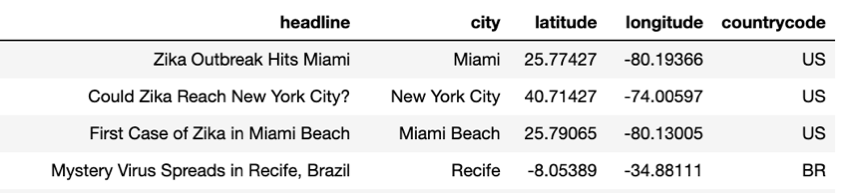

Upload a link to your Jupyter Notebook (preferably hosted on GitHub) in the blank below and hit submit. After submitting, you can view an example solution in the next section.

# Clustering Headlines Based on Location

## Applying Clustering Algorithms to Find Geographically Similar Headlines

**Objective**

Cluster (find groups of) headlines based on the geographic coordinates using both k-means clustering and DBSCAN. Visualize the clusters on a world map to check the results. Try different parameters and distance measures in the algorithms to produce better clusters.

**Workflow**

1. Apply k-means clustering and the DBSCAN algorithm to the latitude and longitude of each headline.
    * Use the default initial parameters for the algorithm or, if you have prior experience, choose parameters you think will work well.
    * Assign the cluster labels as another column on the DataFrame.
1. Visualize the clusters on a world map using the Basemap library. Color the headlines by the cluster assignment.
    * Determine if the clusters are reasonable: Are headlines geographically close to one another in the same cluster?
    * Write a visualization function to quickly check clustering results.
1. In the likely case that the first clustering is not ideal, adjust the parameters of the algorithm you choose or use a different algorithm.
    * You can use an [elbow plot](https://bl.ocks.org/rpgove/0060ff3b656618e9136b) to select the number of clusters in k-means.
    * The two most important parameters for DBSCAN are ***eps*** and ***min_samples***
1. Try using DBSCAN with the great circle distance, which finds the distance between two geographic points on a spherical globe.
    * Write a function to return the Great Circle distance between two coordinate points.
    * Use this function as the ***metric*** for DBSCAN.
1. Repeat the above steps—cluster, visualize, analyze, tune—as many times as is required until the algorithm correctly assigns close points to the same cluster without too many outliers.

**Importance to project**

* Clustering is a form of unsupervised learning that tries to match similar entities with features (for example, geographic coordinates) and a measure (for example, Euclidean distance between the coordinates). We don’t know ahead of time which headlines go in which clusters, so we need a machine learning algorithm to find the clusters for us based on the data we provide.

* We are using machine learning to extract additional information from our data set, but this time we are compressing the data instead of adding more. We use the algorithm’s output to focus on only the most important clusters and headlines instead of having to examine them all.

* **In the next section, we will interpret the algorithm’s output to identify disease outbreaks.**

> **Notes**
> 
> * You may be surprised that we are using our intuition—by visualizing the clusters—to determine if they are acceptable. This is common in data science: often the fastest way to find out if an algorithm is working properly is to assess the outputs with your own knowledge. We can be quite accurate in immediately spotting if something is off with the model.
> * Again, notice the iterative nature of this section. It will require several tries to find the best model parameters. Don’t get frustrated if you can’t figure them out at first. Also, don’t be afraid to go back and redo the previous sections if data quality is causing problems.

**Resources**

* Chapter 10, [Clustering with K-Means and DBSCAN](https://liveproject.manning.com/module/93_4_2/discovering-disease-outbreaks-from-news-headlines/3--clustering-headlines-based-on-location/3-2--clustering-with-kmeans-and-dbscan?), from *Data Science Bookcamp* by Leonard Apeltsin in section 3.2 can help you work with the clustering algorithms and tune the parameters.
* Chapter 11, [Plotting Maps with Basemap](https://liveproject.manning.com/module/93_4_3/discovering-disease-outbreaks-from-news-headlines/3--clustering-headlines-based-on-location/3-3--plotting-maps-using-basemap?), from *Data Science Bookcamp* by Leonard Apeltsin in section 3.3 can help you plot geographic maps of clustered headlines.
Referring to the Scikit-Learn documentation on these algorithms is crucial.
    * DBSCAN:
        - [Method documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
        - [User Guide](https://scikit-learn.org/stable/modules/clustering.html#dbscan)
    * K-Means:
        - [Method Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
        - [User Guide](https://scikit-learn.org/stable/modules/clustering.html#k-means)
    * [The Basemap documentation](https://basemaptutorial.readthedocs.io/en/latest/index.html#basemap-tutorial) is quite useful for picking up what you need to make a world map with the clustered headlines.


## Clustering with K-Means and DBSCAN

>excerpt from *Data Science Bookcamp*: Five Python Projects MEAP V04 livebook | Leonard Apeltsin 
<br>[go to book](https://livebook.manning.com/book/data-science-bookcamp/chapter-10)

Clustering is the process of organizing data-points into conceptually meaningful groups. What makes a given group "conceptually meaningful"? There is no easy answer to that question. The usefulness of any clustered output is dependent on the task we’ve been assigned.

Image that we’re asked to cluster a collection of pet photos. Do we cluster fish and lizards in one group and the fluffy pets (such as hamsters, cats, and dogs) into another? Or should hamsters, cats, and dogs be assigned 3 separate clusters of their own? If so, perhaps we should consider clustering pets by breed. Thus, Chihuahuas and Great Danes fall into diverging clusters. Differentiating between dog breeds will not be easy. However, we can easily distinguish between Chihuahuas and Great Danes based on breed size. Maybe we should compromise? We’ll cluster on both fluffiness and size, thus bypassing the distinction between the Cairn Terrier and similar-looking Norwich Terrier.

Is the compromise worth it? It depends on our data science task. Suppose we work for a pet-food company, and our aim is to estimate demand for dog food, cat food, and lizard food. Under these conditions, we must distinguish between fluffy dogs, fluffy cats, and scaly lizards. However, we won’t need resolve differences between separate dog-breeds. On the other hand, image an analyst at a vet’s office, who’s trying to group pet-patients by their breed. This second task requires a much more granular level of group resolution.

Different situations depend on different clustering techniques. Its up to us as data scientists to choose the correct clustering solution. Over course of our careers, we will cluster thousands (if not tens of thousands) of datasets, using a variety of clustering algorithms. The most commonly used algorithms will rely on some notion of "centrality" to distinguish between clusters.

**Using Centrality to Discover Clusters**

In Section Five, we learned how the centrality of data can be represented using the mean. Later, in Section Seven, we computed the mean-length within a single group of fish. Eventually, we compared 2 separate sets of fish by analyzing the difference between their means. We utilized that difference to determine if all the fish belonged to the same group. Intuitively, all data-points within a single group should cluster around one central value. Meanwhile, the measurements in 2 divergent groups should cluster around 2 different means. Thus, we can utilize centrality to distinguish between 2 divergent groups. Lets explore this notion in concrete detail.

Suppose we take a field trip to a lively local pub and see 2 dartboards hanging side-by-side. Each of the dartboards is completely covered in darts, and there are also darts protruding from the walls. The tipsy players in the pub aim for the bull’s-eye of one board or the other. Frequently, they miss. This leads to the observed scattering of darts centered around the 2 bull’s-eyes.

Lets simulate the scattering numerically. We’ll treat each bull’s-eye location as a 2D coordinate. Darts are randomly flung at that coordinate. Consequently, the 2D position of each dart is randomly distributed. The most appropriate distribution for modeling dart position is the Normal distribution. This is true for the following 2 reasons:

- A typical dart thrower will aim at the bull’s-eye, not at the edge of the dartboard. Thus, each dart is more likely to strike close to the center of the board. This behavior is consistent with random Normal samples. Sampled Normal values closer to the mean will occur more frequently than values that are further from the mean.
- We expect the darts to strike the board symmetrically, relative to the center. Darts will strike 3 inches left of center and 3 inches right of center with equal frequency. This symmetry is captured by the bell-shaped Normal curve.

Suppose the first bull’s-eye is located at a coordinate of [0, 0]. A dart is thrown at that coordinate. We’ll model the x and y positions of the dart using 2 Normal distributions. These distributions share a mean of 0. We’ll also assume that they share a variance of 2. The code below will generate the random coordinates of the dart.


**This listing Modeling dart coordinates using 2 Normal distributions**

In [ ]:
import numpy as np
np.random.seed(0)
mean = 0
variance = 2
x = np.random.normal(mean, variance ** 0.5)
y = np.random.normal(mean, variance ** 0.5)
print(f"The x coordinate of a randomly thrown dart is {x:.2f}")
print(f"The y coordinate of a randomly thrown dart is {y:.2f}")

```python
The x coordinate of a randomly thrown dart is 2.49
The y coordinate of a randomly thrown dart is 0.57
```

> **NOTE**<br>
> We can more efficiently model dart position using the `np.random.multivariate_normal` method. That method will select a single random point from a **Multivariate Normal distribution**. The Multivariate Normal curve is simply a Normal curve that is extended to more than one dimension. Our 2D Multivariate Normal distribution will resemble a round hill whose summit is positioned at `[0, 0]`.```

Lets simulate 5,000 random darts tossed at the bulls'-eye positioned at `[0, 0]`. We’ll also simulate 5,000 random darts tossed at a second bull’s-eye, positioned at `[0, 6]`. Afterwards, we’ll generate a scatter plot of all the random dart coordinates.

**This listing Simulating randomly thrown darts**

In [ ]:
import matplotlib.pyplot as plt
np.random.seed(1)
bulls_eye1 = [0, 0]
bulls_eye2 = [6, 0]
bulls_eyes = [bulls_eye1, bulls_eye2]
x_coordinates, y_coordinates = [], []
for bulls_eye in bulls_eyes:
    for _ in range(5000):
        x = np.random.normal(bulls_eye[0], variance ** 0.5)
        y = np.random.normal(bulls_eye[1], variance ** 0.5)
        x_coordinates.append(x)
        y_coordinates.append(y)

plt.scatter(x_coordinates, y_coordinates)
plt.show()

**Figure-10.1. A simulation of darts randomly scattered around 2 bull’s-eye targets.**
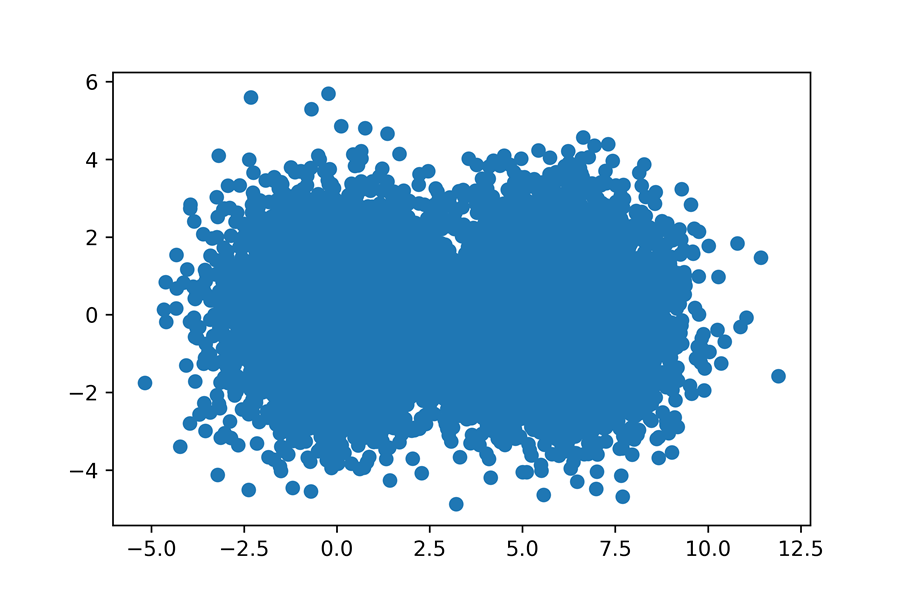

Two overlapping dart-groups appear within the plot. The 2 groups contains 10,000 darts. Half the darts were aimed at the bull’s-eye on the left. The other darts were aimed at the bull’s-eye on the right. Each dart has an intended target. We can estimate that target just by looking at the plot. Darts closer to `[0, 0]` were probably aimed at the bull’s-eye on the left. We’ll incorporate this assumption into our dart-plot.

Lets assign each dart to its `nearest bull’s-eye`. We’ll start by defining a nearest_bulls_eye function. The function will take as input a `dart` list. That list will hold the x and y positions of some dart. The function will return will return the index of the bull’s-eye that is most proximate to `dart`. We’ll measure dart-proximity using Euclidean distance, which is the standard straight-line distance between 2 points.

>**NOTE**
>Euclidean distance arises from the Pythagorean theorem. Suppose we examine a dart at position `[x_dart, y_dart]` relative to a bull’s-eye at position `[x_bull, y_bull]`. According to the Pythagorean theorem, 
$$distance^2=(x\_dart-x\_bull)^2+(y\_dart-y\_bull)^2$$
> We can solve for distance using a custom Euclidean function. Alternatively, we can use the `scipy.spatial.distance.euclidean` function provided by SciPy.

Below, we’ll define `nearest_bulls_eye`, and apply it to darts `[0, 1]` and `[6, 1]`.

**This listing Assigning darts to the nearest bull’s-eye**

In [ ]:
from scipy.spatial.distance import euclidean

def nearest_bulls_eye(dart):
    distances = [euclidean(dart, bulls_e) for bulls_e in bulls_eyes]
    return np.argmin(distances)

darts = [[0,1], [6, 1]]
for dart in darts:
    index = nearest_bulls_eye(dart)
    print(f"The dart at position {dart} is closest to bulls-eye {index}")

Now, we will apply the `nearest_bulls_eye` function to all our computed dart coordinates. Afterwards, each dart-point will be plotted using one of 2 colors, in order to distinguish between the 2 bull’s-eye assignments.

**
This listing Coloring darts based on nearest bull’s-eye**

In [ ]:
def color_by_cluster(darts):
    nearest_bulls_eyes = [nearest_bulls_eye(dart) for dart in darts]
    for bs_index in range(len(bulls_eyes)):
        selected_darts = [darts[i] for i in range(len(darts))
                          if bs_index == nearest_bulls_eyes[i]]
        x_coordinates, y_coordinates = np.array(selected_darts).T
        plt.scatter(x_coordinates, y_coordinates,
                    color=['g', 'k'][bs_index])
    plt.show()

darts = [[x_coordinates[i], y_coordinates[i]]
         for i in range(len(x_coordinates))]
color_by_cluster(darts)

**Figure-10.2. Darts colored based on proximity to the nearest bull’s-eye. Cluster A represents all points closest to the left bull's-eye, and Cluster B represents all points closet to the right bull's-eye.**
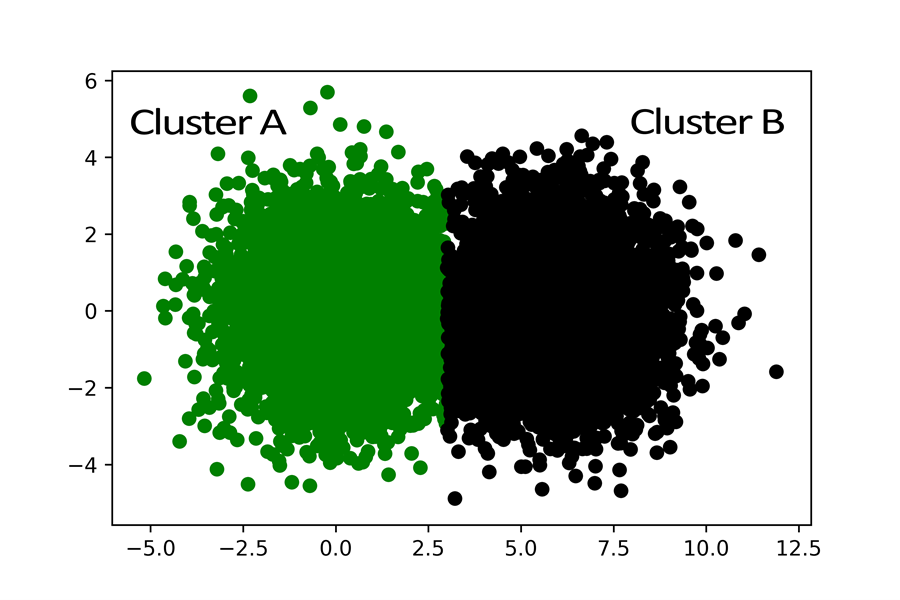

The colored darts sensibly split into 2 even clusters. Our discovery of these clusters depended our knowledge of the bulls'-eye coordinates. How would we identify such clusters if no central coordinates were provided? Well, one primitive strategy is to simply guess the location of the bull’s-eyes. We can pick 2 random darts. We’ll hope these darts are somehow relatively close to each of the bull’s-eyes, though the likelihood of that happening is incredibly low. Coloring darts based on 2 randomly chosen centers will in most cases not yield good results.

**This listing Assigning darts to randomly chosen centers**

In [ ]:
bulls_eyes = np.array(darts[:2])
color_by_cluster(darts)

**Figure-10.3. Darts colored based on proximity to randomly selected centers. Cluster B is stretched too far out to the left.**
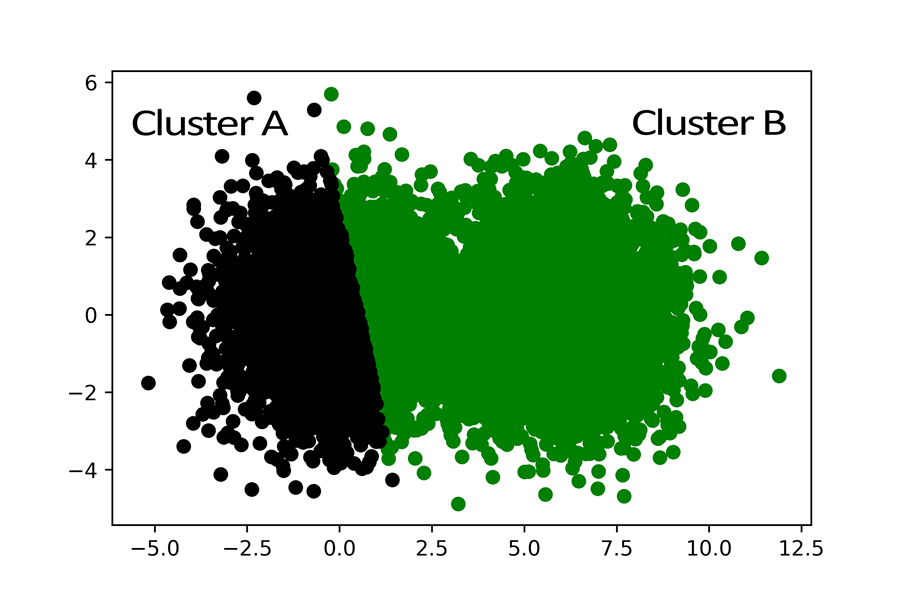

From a qualitative standpoint, our indiscriminately selected centers simply feel wrong. For instance, Cluster B on the right seems to be stretching way too far to the left. The arbitrary center we’ve assigned it doesn’t appear to match its actual bulls'-eye point. Yet there’s a way to remedy our error. We can compute the mean coordinates of all the points within the stretched right clustered group, and afterwards utilize these coordinates to adjust our estimation of the group’s center. After assigning the cluster’s mean coordinates to the bulls'-eye, we can re-apply our distance-based grouping technique in order to adjust the right-most cluster’s boundaries. In fact, for maximum effectiveness, we will also reset the left-most cluster’s center to its mean prior to re-running our centrality-based clustering.

>**NOTE**
>When we compute the mean of 1D array, we return a single value. We are now extending that definition to encompass multiple dimensions. When we compute the mean of 2D array, we return the mean of all x-coordinates, and also the mean of all y-coordinates. The final output is a 2D array containing means across the x-axis, and the y-axis.

**This listing Assigning darts to centers based on mean**

In [ ]:
def update_bulls_eyes(darts):
    updated_bulls_eyes = []
    nearest_bulls_eyes = [nearest_bulls_eye(dart) for dart in darts]
    for bs_index in range(len(bulls_eyes)):
        selected_darts = [darts[i] for i in range(len(darts))
                          if bs_index == nearest_bulls_eyes[i]]
        x_coordinates, y_coordinates = np.array(selected_darts).T
        mean_center = [np.mean(x_coordinates), np.mean(y_coordinates)]
        updated_bulls_eyes.append(mean_center)

    return updated_bulls_eyes


bulls_eyes = update_bulls_eyes(darts)
color_by_cluster(darts)

**Figure-10.4. Darts colored based on proximity to recomputed centers. The 2 clusters now appear to be more even.**
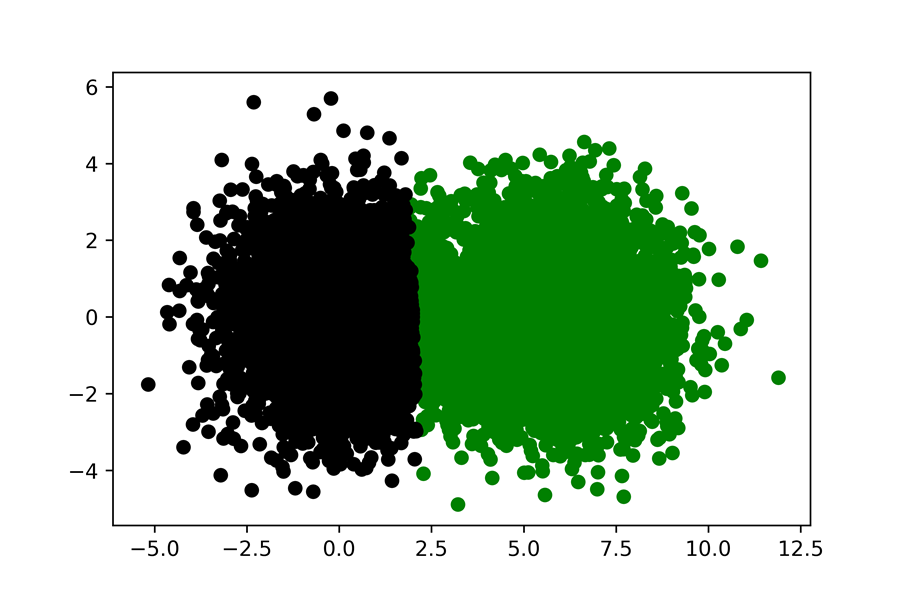
Already the results are looking better, though they’re not quite as effective as they could be. The cluster’s centers still appear a little off. Lets remedy the results by repeating the mean-based centrality adjustment over 10 additional iterations.

**This listing Adjusting bull’s-eye positions over 10 iterations**



In [ ]:
for i in range(10):
    bulls_eyes = update_bulls_eyes(darts)

color_by_cluster(darts)

**Figure-10.5. Darts colored based on proximity to iteratively recomputed centers**
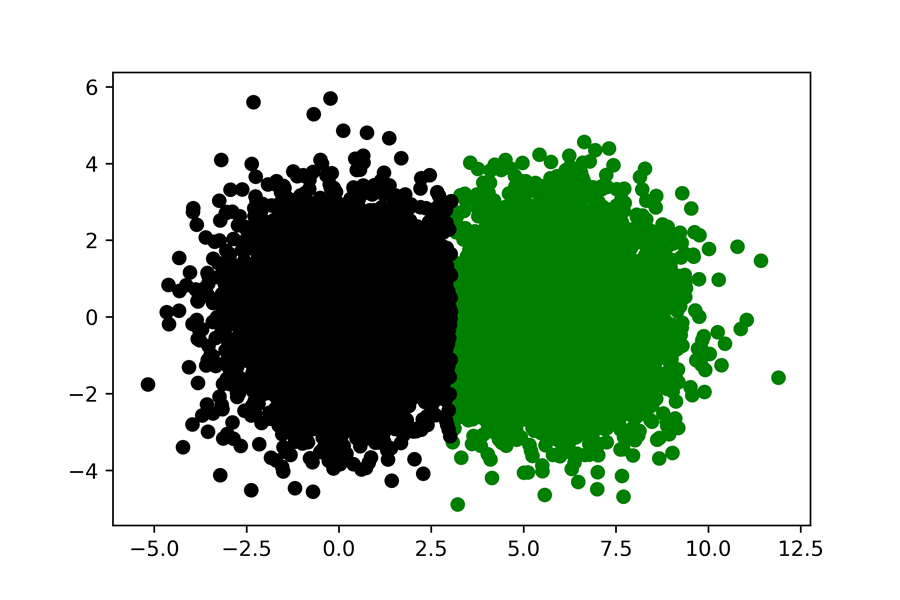
Viola! Now the 2 sets of darts have been perfectly clustered. We have essentially replicated the K-means clustering algorithm, which organizes data using centrality.

### **K-Means: A Clustering Algorithm for Grouping Data into K Central Groups**

The K-means algorithm assumes that inputted data-points swirl around K different centers. Each central coordinate is like a hidden bulls'-eye surrounded by scattered data-points. The purpose of the algorithm is to uncover these hidden central coordinates.

We initialize K-means by first selecting K, which is the number of central coordinates we will search for. In our dartboard analysis, K was set to 2, though generally K can equal any whole number. The algorithm proceeds to choose K data-points at random. These data-points are treated as though they were true centers. Afterwards the algorithm iterates by updating the chosen central locations, which data scientists call centroids. During a single iteration, every data-point is assigned to its closest center. This leads to the formation of K groups. Next, the center of each group is updated. The new center equals the the mean the group’s coordinates. If we repeat the process long enough, the group-means will converge to K representative centers. The convergence is mathematically guaranteed. However, we cannot know in advance the number of iterations required for the convergence to take place. Thus, a common trick is to halt the iterations when the all of the newly computed centers do not deviate significantly from their predecessors.

**Figure-10.6. The K-means algorithm iteratively converging from 2 randomly selected centroids to the actual bulls'-eye centroids.**
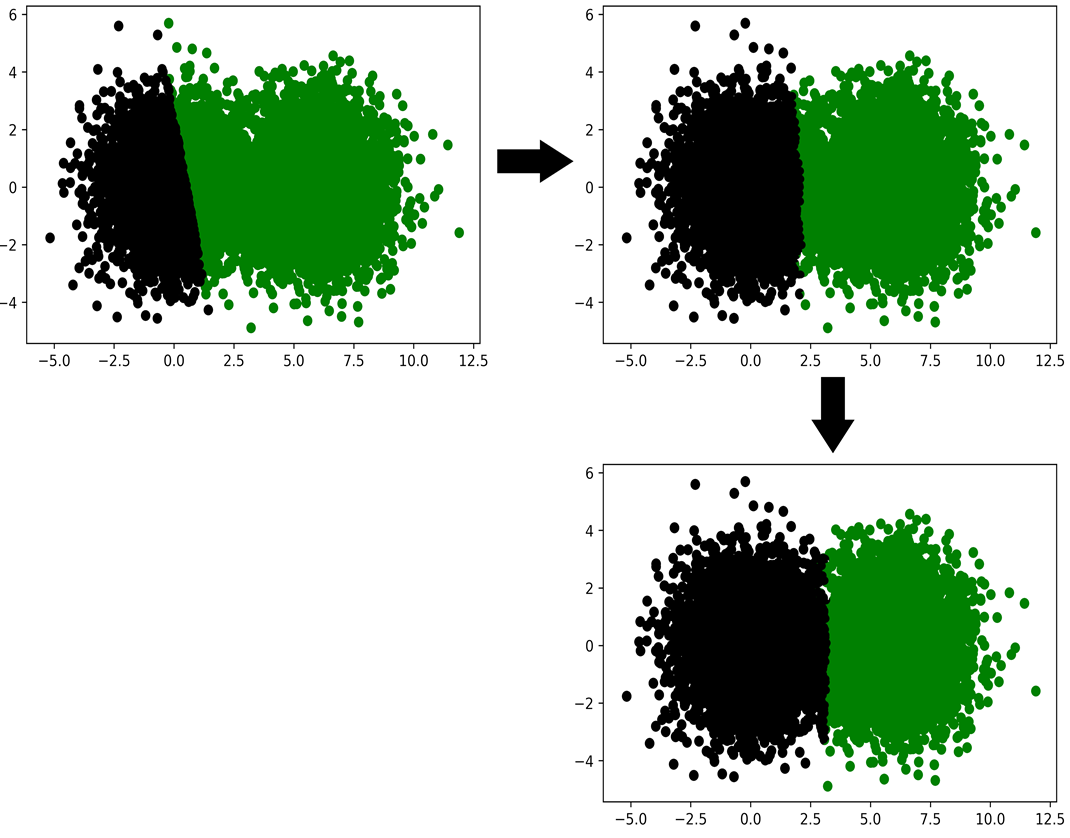
K-means is not without its limitations. The algorithm is predicated on our knowledge of K; the number of clusters to look for. Frequently, such knowledge is not available. Also, while K-means commonly finds reasonable centers, its not mathematically guaranteed to find the best possible centers in the data. Occasionally, K-means will return non-intuitive or sub-optimal groups due to poorly selected random centroids at the initialization step of the algorithm. Finally, K-means pre-supposes that the clusters in the data actually swirl around K central locations. However, as we’ll learn later in the Section, this supposition does not always hold.

### **K-means Clustering Using Scikit-learn**
The K-means algorithm will run in reasonable time, if it has been implemented efficiently. A speedy implementation of the algorithm is available through the external Scikit-Learn library. Scikit-learn is an extremely popular machine learning toolkit built on-top of NumPy and Scipy. It features a variety of core classification, regression, and clustering algorithms, including of course, K-means. Lets install the library. Afterwards, we’ll import Scikit-learn’s KMeans clustering class.

> **NOTE**
> Call "`pip install scikit-learn`" from the command-line terminal in order to install the Scikit-learn library.

This listing Importing KMeans from Scikit-learn
```python
from sklearn.cluster import KMeans
```
Applying `KMeans` to our `darts` data is easy. First, we need to run `KMeans(n_clusters=2)`. This will create a `cluster_model` object capable of finding 2 bull’s-eye centers. Afterwards, we can execute K-means by running `cluster_model.fit_predict(darts)`. That method-call will return an `assigned_bulls_eyes` array, which will store the bull’s-eye index of each dart.

**This listing K-means clustering using Scikit-learn**

In [ ]:
from sklearn.cluster import KMeans

cluster_model = KMeans(n_clusters=2)
assigned_bulls_eyes = cluster_model.fit_predict(darts)

print("Bull's-eye assignments:")
print(assigned_bulls_eyes)

```python
Bull's-eye assignments:
[0 0 0 ... 1 1 1]
```

Lets quickly color our darts based on their clustering assignments, in order to confirm that the assignments makes sense.

**This listing Plotting K-means cluster assignments**

In [ ]:
for bs_index in range(len(bulls_eyes)):
    selected_darts = [darts[i] for i in range(len(darts))
                      if bs_index == assigned_bulls_eyes[i]]
    x_coordinates, y_coordinates = np.array(selected_darts).T
    plt.scatter(x_coordinates, y_coordinates,
                color=['g', 'k'][bs_index])
plt.show()

**Figure-10.7. The K-means clustering results returned by Scikit-learn are consistent with our expectations.**
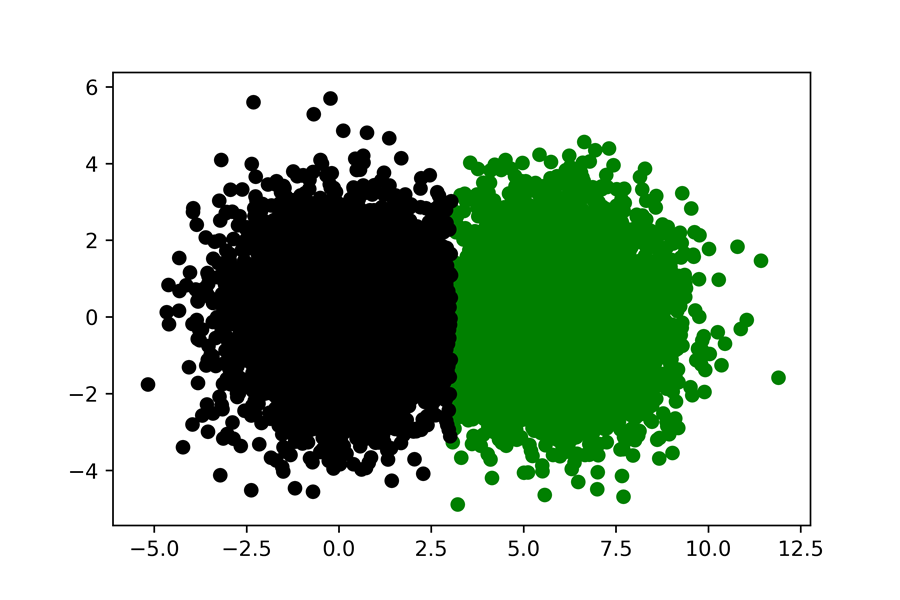
Our clustering model has located the centroids in the data. Now, we can reuse these centroids to analyze new data-points that the model has not seen before. Executing `cluster_model.predict([x, y])` will assign a centroid to a data-point defined by x and y. We’ll use the predict method to cluster 2 new data-points below.

**This listing Using cluster_model to cluster new data**

In [ ]:
new_darts = [[500, 500], [-500, -500]]
new_bulls_eye_assignments = cluster_model.predict(new_darts)
for i, dart in enumerate(new_darts):
    bulls_eye_index = new_bulls_eye_assignments[i]
    print(f"Dart at {dart} is closest to bull's-eye {bulls_eye_index}")
    

```python
Dart at [500, 500] is closest to bull's-eye 0
Dart at [-500, -500] is closest to bull's-eye 1
```
### **Selecting the Optimal K Using the Elbow Method**
K-means relies on an inputted K. This can be a serious hindrance when the number of authentic clusters in the data isn’t known in advance. We can however, estimate an appropriate value for K using a technique known as the **Elbow method**.

The Elbow method depends on a calculated value called **inertia**, which is the sum of the squared distances between each point and its closest K-means center. If K is 1, then the inertia will equal the sum of all squared distances to the dataset’s mean. This value, as discussed in Section Five, is directly proportional to the variance. Variance, in turn, is a measure of dispersion. Thus, if K is 1, then the inertia is an estimate of dispersion. This property holds true even if K is greater than 1. Basically, inertia estimates total dispersion around our K computed means.

Inertia’s estimate of dispersion allows us to determine if our K-value is too high or too low. For example, imagine if we set K to 1. Potentially, many of our data-points will be positioned too far from one center. Our dispersion will be large, and our inertia will be large. As we increase K towards a more sensible number, the additional centers will cause the inertia to decrease. Eventually, if we go overboard and set K to equal to the total number of points, then each data point will fall into its very own private cluster. Dispersion will be eliminated and inertia will drop to zero.

**Figure-10.8. Six points, numbered 1 through 6, are plotted in 2D space. Centers, marked by stars, are computed across various values of K. A line is drawn from every point to its nearest center. Inertia is computed by summing the squared lengths of the six lines. A) K=1. All six lines stretch out from a single center. The inertia is quite large. B) K=2. Points 5 and 6 are now very close to a second center. The inertia is reduced. C) K=3. Points 1 and 3 are substantially closer to a newly formed center. Points 2 and 4 are also substantially closer to a newly formed center. The inertia has radically decreased. D) K=4. Points 1 and 3 now overlap with their centers. Their contribution to the inertia has shifted from a very low value to zero. The distances between the remaining four points and their associated centers remains unchanged. Thus, increasing K from 3 to 4 caused a very small decrease in inertia.**
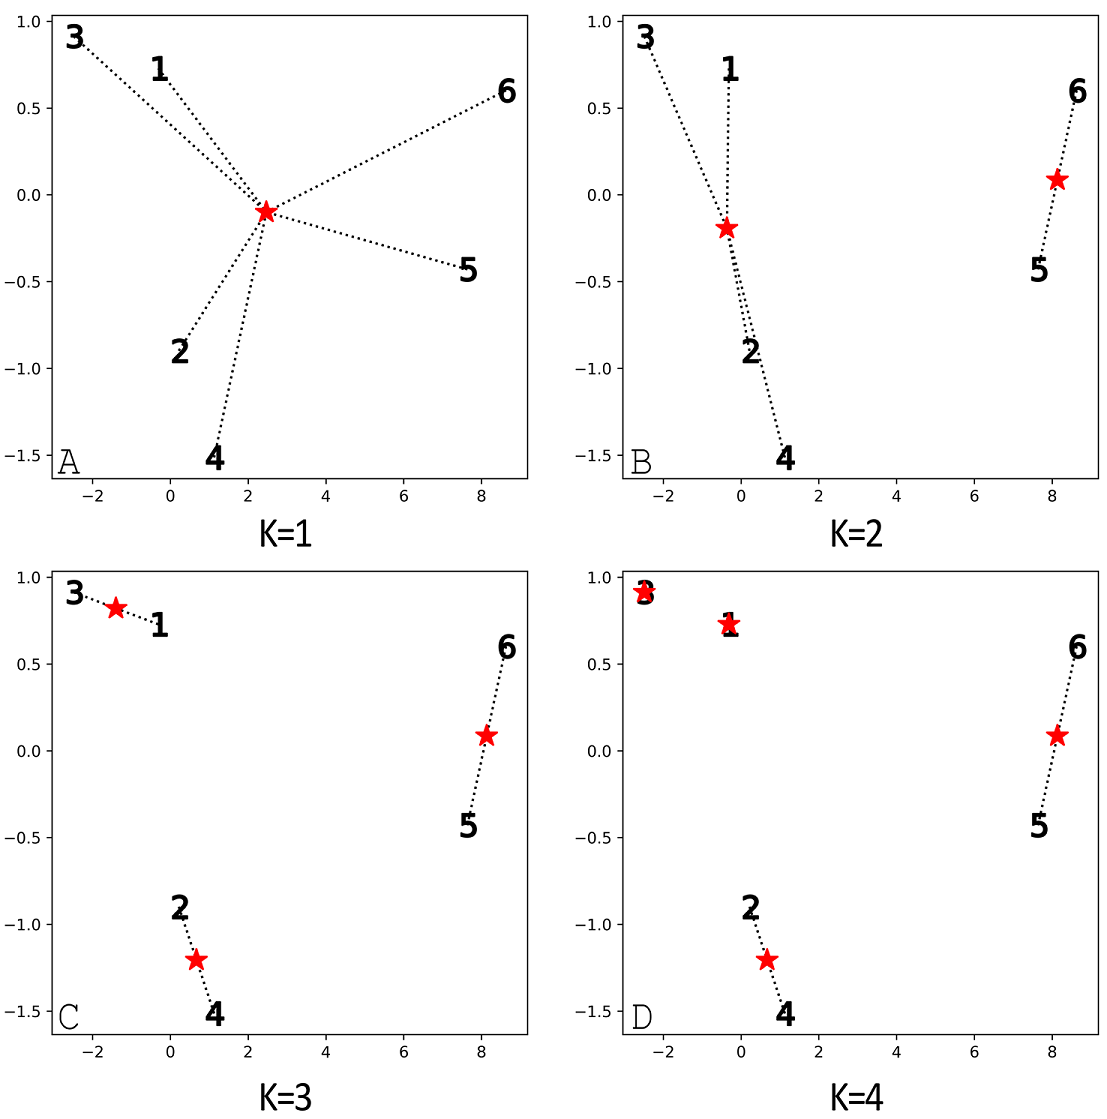

Some inertia values are too large. Others are too low. Somewhere in-between might lie value that’s just right. How do we find it?

Lets work out a solution. We’ll begin by plotting the inertia of our dartboard dataset over a large range of K values. Inertia is automatically computed for each Scikit-learn KMeans object. We can access this stored value through the model’s `_inertia` variable.

**This listing Plotting the K-means inertia**

In [ ]:
k_values = range(1, 10)
inertia_values = [KMeans(k).fit(darts).inertia_
                  for k in k_values]

plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

**Figure-10.9. An inertia plot for a dartboard simulation containing 2 bull’s-eyes targets. The plot resembles an arm bent at the elbow. The elbow points directly to a K of 2.**
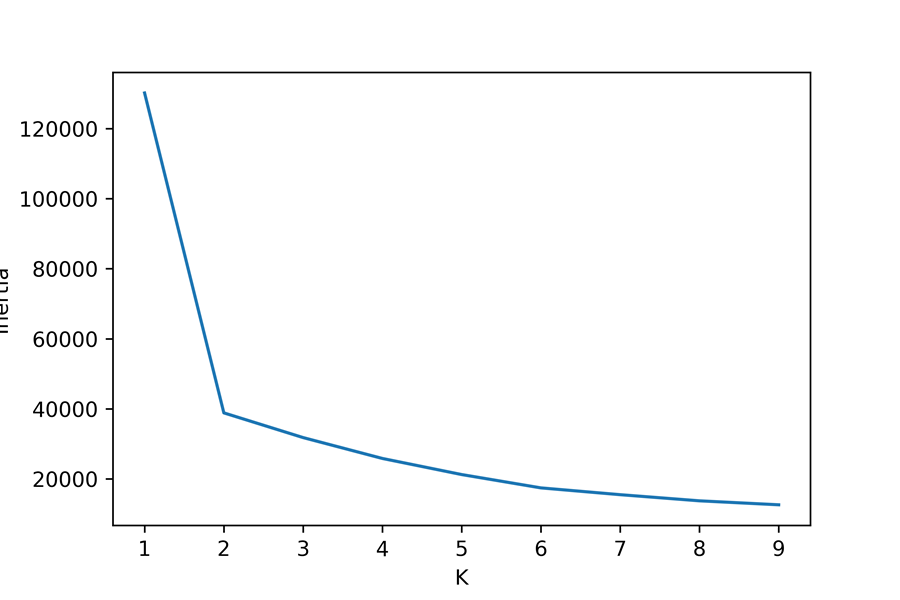

The generated plot resembles an arm bent at the elbow. The elbow points directly to a K of 2. As we already know, this K accurately captures the two centers we have pre-programmed into the dataset.

Will the approach still hold if the number of present centers is increased? We can find out by adding an additional bull’s-eye to our dart-throwing simulation. After we raise the cluster count to 3, we’ll regenerate our inertia plot.

**This listing Plotting inertia for a 3-dartboard simulation**

In [ ]:
new_bulls_eye = [12, 0]
for _ in range(5000):
    x = np.random.normal(new_bulls_eye[0], variance ** 0.5)
    y = np.random.normal(new_bulls_eye[1], variance ** 0.5)
    darts.append([x, y])

inertia_values = [KMeans(k).fit(darts).inertia_
                  for k in k_values]

plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

**Figure-3.10. An inertia plot for a dartboard simulation containing 3 bull’s-eyes targets. The plot resembles an arm bent at the elbow. The lower-most portion of the elbow points to a K of 3.**
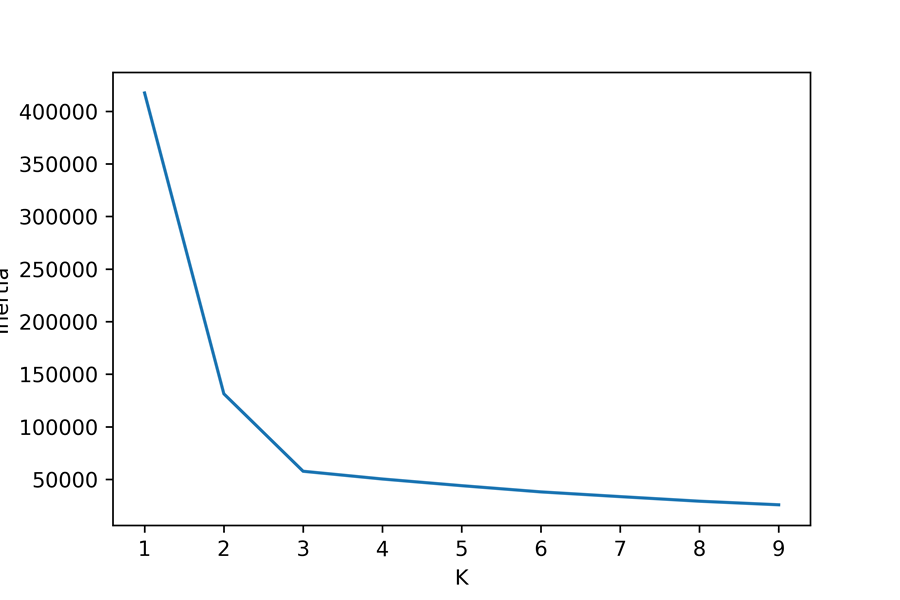
Adding a third center leads to a new elbow whose lower-most inclination points to a K of 3. Essentially, our elbow plot traces the dispersion captured by each incremental K. A rapid decrease in inertia between consecutive K-values implies that scattered data-points have been assigned to a tighter cluster. The reduction in inertia incrementally loses its impact as the inertia curve flattens out. This transition from a vertical drop to more level angle leads to the presence of an elbow shape in our plot. We can use the position of the elbow to select a proper K in the K-means algorithm.

The Elbow method selection criterion is a useful heuristic, but it is not guaranteed to work in every case. Under certain conditions, the elbow will level off slowly over multiple K values, making it difficult select a single valid cluster count.

> **NOTE**
> There exist more powerful K-selection methodologies, such as the **Silhouette score**, which captures the distance of each point to neighboring clusters. A thorough discussion of the Silhouette score is beyond the scope of this book. However, you’re encouraged explore the score on your own, using the `sklearn.metrics.silhouette_score` method.

**K-means Clustering Methods**
```python
k_means_model = KMeans(n_clusters=K) #: Creates a K-means model that’s intended to search for K different centroids. We’ll need to fit these centroids to inputted data.

clusters = k_means_model.fit_predict(data) #: Executes K-means on inputted data, using an initialized KMeans object. The returned clusters array contains cluster ids ranging from 0 to K. The cluster id of data[i] is equal to clusters[i].

clusters = KMeans(n_clusters=K).fit_predict(data) #: Executes K-means in a single line of code, and returns the resulting clusters.

new_clusters = k_means_model.predict(new_data) #: Finds the nearest centroids to previously unseen data, using the existing centroids within a data-optimized KMeans object.

inertia = k_means_model.inertia_ #: Returns the inertia associated with a data-optimized KMeans object.

inertia = KMeans(n_clusters=K).predict(data).inerta_ #: Executes K-means in a single line of code, and returns the resulting inertia.
```

The Elbow method isn’t perfect, but it will perform reasonably well if the data is clearly centered on K distinct means. This of course, assumes that our data-clusters differ due to centrality. However, in many instances, data-clusters differ to due density of data-points in space. Lets explore the concept of density-driven clusters, which are not dependent on centrality.

### **Using Density to Discover Clusters**
Suppose that an astronomer discovers a new planet at the far-flung edges of the solar system. The plant, much like our Saturn, has multiple rings spinning in constant orbit around its center. Each ring is formed from thousands of rocks. We’ll model these rocks as individual points, defined by x and y coordinates. Lets generate 3 rock rings composed of many rocks, using Sckit-Learn’s `makes_circles` function.

**This listing Simulating rings around a planet**

In [ ]:
from sklearn.datasets import make_circles

x_coordinates = []
y_coordinates = []
for factor in [.3, .6, 0.99]:
    rock_ring, _ = make_circles(n_samples=800, factor=factor,
                                noise=.03, random_state=1)
    for rock in rock_ring:
        x_coordinates.append(rock[0])
        y_coordinates.append(rock[1])

plt.scatter(x_coordinates, y_coordinates)
plt.show()

**Figure-10.11. A simulation of 3 rock rings positioned around a central point.**
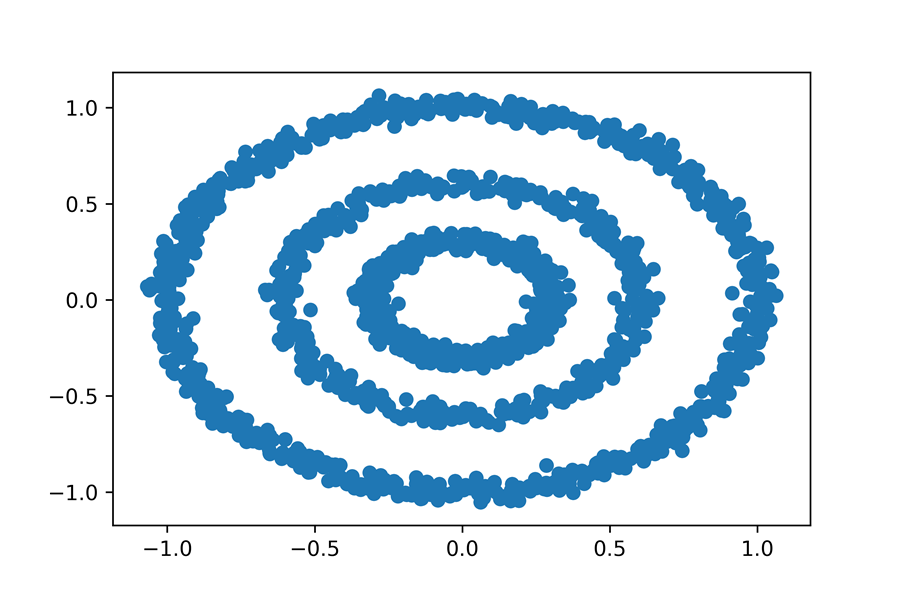

Three ring-groups are clearly present in the plot. Lets search for these 3 clusters using K-means. Obviously, we’ll set our K to 3.

**This listing Using K-means to cluster rings**

In [ ]:
rocks = [[x_coordinates[i], y_coordinates[i]]
          for i in range(len(x_coordinates))]
rock_clusters = KMeans(3).fit_predict(rocks)

colors = [['g', 'y', 'k'][cluster] for cluster in  rock_clusters]
plt.scatter(x_coordinates, y_coordinates, color=colors)
plt.show()

**Figure-10.12. K-means clustering fails to properly identify the 3 distinct rock rings**
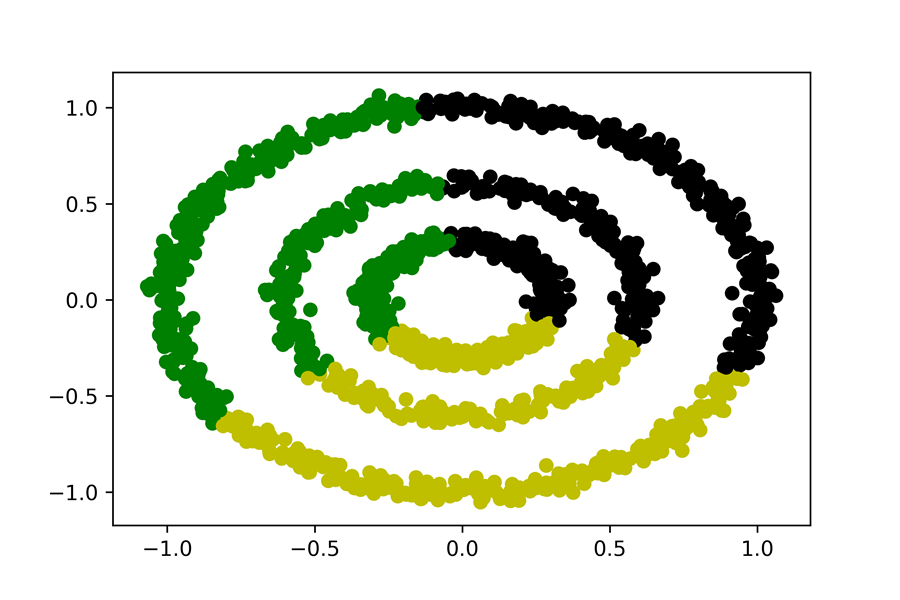
The output is an utter failure! K-means dissects the data into 3 symmetric segments, and each segment spans across multiple rings. The solution doesn’t align with our intuitive expectation that each ring should fall into its own distinct group. What went wrong? Well, K-means assumed that the 3 clusters are defined by three unique centers, but the actual rings spin around a single central point. The difference between clusters is driven not by centrality, but by density. Each ring is constructed from a dense collection of points, with empty areas of sparsely populated space serving as the boundaries between rings.

We need to design an algorithm that will cluster data within dense regions of space. Doing so requires that we define whether a given region is dense or sparse. One simple definition of density is as follows; a point is in a dense region only if it’s located within a distance X of Y other points. We’ll refer to X and Y as epsilon and min_points, respectively. Below, we’ll set epsilon to 0.1 and min_points to 10. Thus, our rocks are present in a dense region of space if they’re within a 0.1 radius of at-least 10 other rocks.

**This listing Specifying density parameters**

In [ ]:
epsilon=0.1
min_points = 10

Lets analyze the density of the first rock in our rocks list. We’ll begin by searching for all the other rocks that are within epsilon units of rocks[0]. We’ll store the indices of these neighboring rocks in a neighbor_indices list.

**This listing Finding the neighbors of rocks[0]**

In [ ]:
neighbor_indices = [i for i, rock in enumerate(rocks[1:])
                    if euclidean(rocks[0], rock) <= epsilon]

Now, we’ll compare the number of neighbors to min_points, in order to determine if rocks[0] lies in a dense region of space.

**This listing Checking the density of rocks[0]**

In [ ]:
num_neighbors = len(neighbor_indices)
print(f"The rock at index 0 has {num_neighbors} neighbors.")

if num_neighbors >= min_points:
    print("It lies in a dense region.")
else:
    print("It does not lie in a dense region.")

```python
The rock at index 0 has 40 neighbors.
It lies in a dense region.
```
The rock at index 0 lies in a dense region of space. Do the neighbors of rocks[0] also share that dense region of space? This is a tricky question to answer. After all, its possible that every neighbor holds less than min_points neighbors of its own. Under our rigorous density definition, we wouldn’t consider these neighbors to be dense points. However, this would lead to a ludicrous situation in which the dense region is composed of just a single point; rocks[0]. We need to avoid such absurd outcomes. Thus, we’ll need to update our density definition. Let’s formally define density as follows:

1. If a point is located within an epsilon distance of min_point neighbors, then that point is in a dense region of space.
2. Every neighbor of a point in a dense region of space will also cluster in that space.

Based our updated definition, we can combine rocks[0] and its neighbors into a single dense cluster.

**This listing Creating a dense cluster**

In [ ]:
dense_region_indices = [0] + neighbor_indices
dense_region_cluster = [rocks[i] for i in dense_region_indices]
dense_cluster_size = len(dense_region_cluster)
print(f"We found a dense cluster containing {dense_cluster_size} rocks")

```python
We found a dense cluster containing 41 rocks
```
The rock and index 0 and its neighbors form a single 41-element dense cluster. What about the neighbors of the neighbors? Do any neighbors-of-neighbors belong to a dense region of space? If so, then by our updated definition, these rocks also belong to the dense cluster. Thus, by analyzing additional neighboring points, we expand the size of dense_region_cluster.

**This listing Expanding a dense cluster**

In [ ]:
dense_region_indices = set(dense_region_indices)
for index in neighbor_indices:
    point = rocks[index]
    neighbors_of_neighbors = [i for i, rock in enumerate(rocks)
                              if euclidean(point, rock) <= epsilon]
    if len(neighbors_of_neighbors) >= min_points:
        dense_region_indices.update(neighbors_of_neighbors)

dense_region_cluster = [rocks[i] for i in dense_region_indices]
dense_cluster_size = len(dense_region_cluster)
print(f"We expanded our cluster to include {dense_cluster_size} rocks")

```python
We expanded our cluster to include 781 rocks
```
We’ve iterated over neighbors of neighbors, and expanded our dense cluster by nearly 20-fold. Why stop there? We can expand our cluster even further by analyzing the density of newly encountered neighbors. Iteratively repeating our analysis will increase the breadth of our cluster boundary. Eventually, the boundary will spread to completely encompass one of our rock rings. Afterwards, with no new neighbors to absorb, we repeated the iterative analysis on a rocks element that has not been analyzed thus far. The repetition will lead to the clustering of additional dense rings.

The procedure described in the previous paragraph is known as **DBSCAN**. The DBSCAN algorithm organizes data based on its spatial distribution.

### **DBSCAN: A Clustering Algorithm for Grouping Data Based on Spatial Density**
DBSCAN is an acronym, which stands for **Density-based Spatial Clustering of Applications with Noise**. This is a ridiculously long name for what essentially is a very simple technique. The technique is executed thusly:

1. We select a random point coordinate from a data list.
2. We obtain all neighbors within an epsilon distance of that point.
3. If less than min_points neighbors are discovered, we repeat step a using a different random point. Otherwise, we group our point and its neighbors into a single cluster.
4. We iteratively repeat steps b and c across all newly discovered neighbors. All neighboring dense points will get merged into the cluster. Our will iterations terminate after the cluster stops expanding.
5. Once we have extracted the entire cluster, we repeat steps a through e on all data-points whose density hasn’t yet been analyzed.

The DBSCAN procedure we have outlined can be programmed in under 20 lines of code. However, any basic implementation will probably run quite slowly on our rocks list. The difficulty in programming DBSCAN is that a speedy version requires some very nuanced optimizations. These optimizations improve neighbor traversal speed, and are beyond the scope of this book. Fortunately, there’s no need for us to rebuild the algorithm from scratch. Scikit-Learn makes DBSCAN available for use. We simply need to import the DBSCAN class from sklearn.cluster. Afterwards, we can initialize the class by assigning epsilon and min_points using the eps and min_samples parameters. Lets utilize DBSCAN to cluster our 3 rings.

**This listing Using DBSCAN to cluster rings**

In [ ]:
from sklearn.cluster import DBSCAN
cluster_model = DBSCAN(eps=epsilon, min_samples=min_points)
rock_clusters = cluster_model.fit_predict(rocks)
colors = [['g', 'y', 'k'][cluster] for cluster in rock_clusters]
plt.scatter(x_coordinates, y_coordinates, color=colors)
plt.show()

**Figure-10.13. DBSCAN clustering accurately identifies the 3 distinct rock rings.**
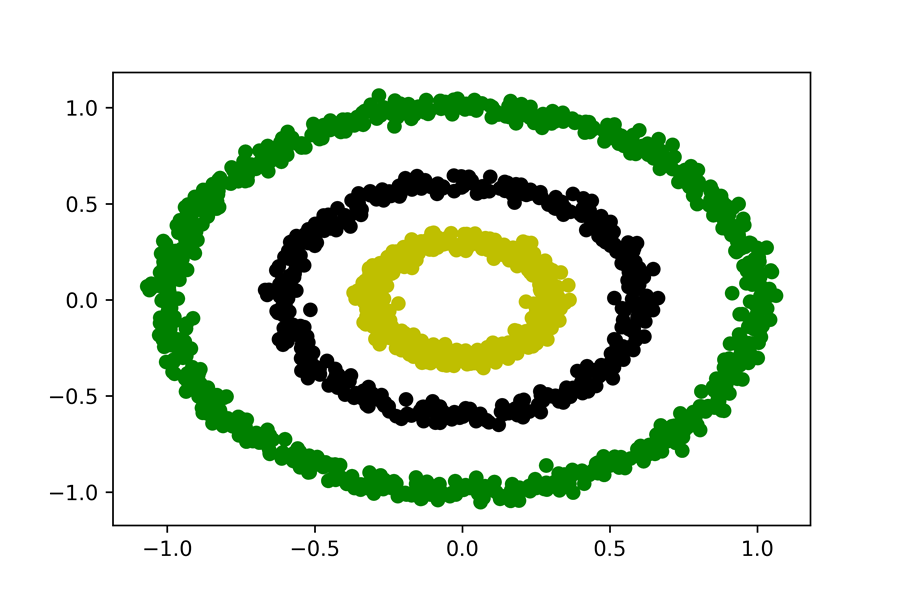
DBSCAN has successfully identified the 3 rock rings. The algorithm succeeded where K-means had failed.

### **Comparing DBSCAN and K-means**
DBSCAN is an advantageous algorithm for clustering data composed of curving and dense shapes. Also, unlike K-means, the algorithm doesn’t require an approximation of the cluster count prior to execution. Additionally, DBSCAN can filter random outliers located in sparse regions of space. For example, if we add an outlier located beyond the boundary of the rings, then DBSCAN will assign it a cluster id of -1. The negative value indicates that the outlier cannot be clustered with the rest of the dataset.

>**NOTE**<br>
>Unlike K-means, a fitted DBSCAN model cannot be re-applied to brand-new data. Instead, we’ll need to combine new and old data, and execute the clustering from scratch. The reason for this is obvious; computed K-means centers can easily be compared to additional data-points. However, the additional data-points could influence the density distribution of previously seen data, which forces DBSCAN to recompute all clusters.

**This listing Finding outliers using DBSCAN**

In [ ]:
noisy_data = rocks + [[1000, -1000]]
clusters = DBSCAN(eps=epsilon,
                  min_samples=min_points).fit_predict(noisy_data)
assert clusters[-1] == -1

There is one other advantage to the DBSCAN technique that is missing from K-means. DBSCAN does not depend on the mean. Meanwhile, the K-means algorithm requires us to compute the mean coordinates of grouped points. As we discussed in Section Five, these mean coordinates will minimize the sum of squared distances to the center. The minimization property only holds if the squared distances are Euclidean. Thus, if our coordinates are not Euclidean, then the mean is not very useful, and the K-means algorithm should not be applied. However, the Euclidean distance is not the only metric for gaging separation between points. In fact, there exist infinite metrics for defining distance. We’ll explore a few of them in the subsequent sub-section. In the process, we will learn how to integrate these metrics into our DBSCAN clustering output.

### **Clustering Based on Non-Euclidean Distance**
Suppose we are visiting Manhattan. We wish to know the walking distance from the Empire State Building to Columbus Circle. The Empire State Building is located at the intersection of 34th street and 5th avenue. Meanwhile, Columbus Circle is located is located at the intersection of 57th street and 8th avenue. The streets and avenues in Manhattan are always perpendicular to each other. This lets us represent Manhattan as a 2D coordinate system, where streets are positioned on the x-axis and avenues are positioned on the y-axis. Under this representation, the Empire State Building is located at coordinate (34, 5) and Columbus Circle is located at coordinate (57, 8). We can easily calculate a straight-line Euclidean distance between the 2 coordinate points. However, that final length would be impassable because towering steel buildings occupy the area outlined by every city block. A more correct solution would be limited to a path across the perpendicular sidewalks that form the City’s grid. Such a route requires us to walk three blocks between 5th avenue and 3rd avenue, and then 23 blocks between 34th street and 57th street, for a distance of 26 blocks total. Manhattan’s average block-length is .17 miles, so we can estimate the walking distance as 4.42 miles. Lets compute that walking distance directly using a generalized `manhattan_distance` function.

**This listing Computing the Manhattan distance**

In [ ]:
def manhattan_distance(point_a, point_b):
    num_blocks = np.sum(np.absolute(point_a - point_b))
    return .17 * num_blocks

x = np.array([34, 5])
y = np.array([57, 8])
distance = manhattan_distance(x, y)

print(f"Manhattan distance is {distance} miles")

```python
Manhattan distance is 4.42 miles
```
Now, suppose we wish to cluster more than 2 Manhattan locations. We’ll assume each cluster holds a point that is within a 1-mile walk of 3 other clustered points. This assumption lets us apply DBSCAN clustering, using Scikit-Learn’s DBSCAN class. We’ll set eps to 1 and min_samples to 3, during DBSCAN’s initialization. Furthermore, we will pass `metric= manhattan_distance` into the initialization method. The metric parameter will swap Euclidean distance for our custom distance metric. Consequently, the clustering distance will correctly reflect the grid-based constraints within the City.

The code below will cluster Manhattan coordinates. Subsequently, these coordinates will be plotted on a grid, along with their cluster designations.

**This listing Clustering using Manhattan distance**

In [ ]:
points = [[35, 5], [33, 6], [37, 4], [40, 7], [45, 5]]
clusters = DBSCAN(eps=1, min_samples=3,
                  metric=manhattan_distance).fit_predict(points)

for i, cluster in enumerate(clusters):
    point = points[i]
    if cluster == -1:
        print(f"Point at index {i} is an outlier")
        plt.scatter(point[0], point[1], marker='x', color='k')
    else:
        print(f"Point at index {i} is in cluster {cluster}")
        plt.scatter(point[0], point[1], color='g')

plt.grid(True, which='both', alpha=0.5)
plt.minorticks_on()


plt.show()

```python
Point at index 0 is in cluster 0
Point at index 1 is in cluster 0
Point at index 2 is in cluster 0
Point at index 3 is an outlier
Point at index 4 is an outlier
```
**Figure-10.14. 5 points in a rectangular grid have been clustered using the Manhattan distance. The 3 points in the lower-left corner of the grid all fall within a single cluster. The remaining two points are outliers, marked by an x.**
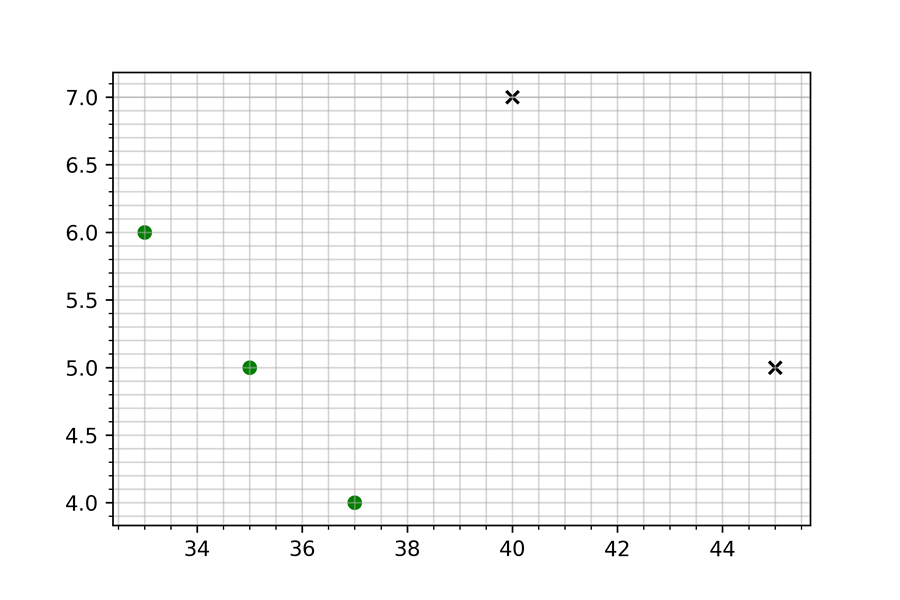

The first 3 locations fall within a single cluster, and the remaining points are outliers. Could we have detected that cluster using the K-means algorithm? Perhaps. After all, our Manhattan block coordinates can be averaged out, making them compatible with a K-means implementation. What if we swap Manhattan distance for a different metric where average coordinates are not so easily obtained? Lets define a non-linear distance metric with the following properties: two points are zero units apart if all their elements are negative, 2 units apart if all their elements are non-negative, and 10 units apart otherwise. Given this ridiculous measure of distance, can we compute the mean of any 2 arbitrary points? We can’t, and K-means cannot be applied. A weakness of the algorithm is that it depends on the existence of an average distance. Unlike K-means, the DBSCAN algorithm does not require our distance function to be linearly divisible. Thus, we can easily run DBSCAN clustering using our ridiculous distance metric.

**This listing Clustering using a ridiculous measure of distance**

In [ ]:
def ridiculous_measure(point_a, point_b):
    is_negative_a = np.array(point_a) < 0
    is_negative_b = np.array(point_b) < 0
    if is_negative_a.all() and is_negative_b.all():
        return 0
    elif is_negative_a.any() and is_negative_b.any():
        return 10
    else:
        return 2


points = [[-1, -1], [-10, -10], [-1000, -13435], [3, 5], [5, -7]]

clusters = DBSCAN(eps=.1, min_samples=2,
                  metric=ridiculous_measure).fit_predict(points)

for i, cluster in enumerate(clusters):
    point = points[i]
    if cluster == -1:
        print(f"{point} is an outlier")
    else:
        print(f"{point} falls in cluster {cluster}")

```python
[-1, -1] falls in cluster 0
[-10, -10] falls in cluster 0
[-1000, -13435] falls in cluster 0
[3, 5] is an outlier
[5, -7] is an outlier
```
Running DBSCAN with our `ridiculous_measure` metric leads to the clustering of negative coordinates into a single group. All other coordinates are treated as outliers. These results are not conceptually practical. Still, the flexibility with regards to custom metric usage is much appreciated. We are not constrained in our metric choice! We could for instance, set the metric to compute traversal distance based on the curvature of the Earth. Such a metric would be particularly useful for clustering geographic locations.

**DBSCAN Clustering Methods**
```python
dbscan_model = DBSCAN(eps=epsilon, min_samples=min_points) #: Creates a DBSCAN model that is intended to cluster by density. A dense point is defined as having at-least min_points neighbors within a distance of epsilon. The neighbors are considered to be part of the same cluster as the point.

clusters = `dbscan_model.fit_predict(data) #: Executes DBSCAN on inputted data, using an initialized DBSCAN object. The clusters array contains cluster ids. The cluster id of data[i] is equal to clusters[i]. Unclustered outlier points are assigned an id of -1.

clusters = DBSCAN(eps=epsilon, min_samples=min_points).fit_predict(data) #: Executes DBSCAN in a single line of code, and returns the resulting clusters.

dbscan_model = DBSCAN(eps=epsilon, min_samples=min_points, metric=metric_function) #: Creates a DBSCAN model where the distance metric is defined by a custom metric function. The metric_function distance metric does not need to be Euclidean.
```

### **Limitations of the DBSCAN Algorithm**
DBSCAN does carry certain drawbacks. The algorithm is intended to detect clusters with similar point-density distributions. However, real-world data varies in density. For instance, pizza shops in Manhattan are distributed more densely than the pizza shops in Orange County. Thus, we might have trouble choosing density parameters that will let us cluster shops in both locations. This brings us a to a second limitation of the algorithm. DBSCAN requires meaningful values for the eps and min_samples parameters. In particular, varying eps inputs will greatly impact the quality of clustering. Unfortunately, there is no one reliable procedure for estimating the appropriate eps. While certain heuristics are occasionally mentioned in the literature, their benefit is minimal. Most of the time, we must rely on our gut-level understanding of the problem in order to assign practical inputs to the 2 DBSCAN parameters. For example, if we were to cluster a set of geographic locations, then our eps and min_samples values would depend on whether the locations are spread out across the entire globe or whether they are constrained to a single geographic region. In each instance, our understanding of density and distance would vary. Generally speaking, if we are clustering random cities spread out across the Earth, then we can set the min_samples and eps parameters to equal 3 cities and 250 miles, respectively. This will assume each cluster holds a city that is within 250 miles of at-least 3 other clustered cities. For a more regional location distribution, a lower eps value will be required.

### **Analyzing Clusters Using Pandas**
So far, we have kept separate our data-inputs and our clustering outputs. For instance, in our rock-ring analysis, the input data is held in `rocks list` while the clustering output is held in a `rock_clusters` array. Tracking both the coordinates and the clusters requires us to map indices between the input list and the output array. Thus, if we wish to extract all the rocks in cluster zero, then we must obtain all instances of `rocks[i]` where `rock_clusters[i] == 0`. This index analysis is slightly convoluted. We can more intuitively analyze clustered rocks by combining the coordinates and the clusters together in a single Pandas table.

The following code will create a Pandas table. The table will hold 3 columns; X, Y, and Cluster. Each i-th row in the table with hold the x-coordinate, the y-coordinate, and the cluster of the rock located at `rocks[i]`.

**This listing Storing clustered coordinates in a table**

In [ ]:
import pandas as pd
x_coordinates, y_coordinates = np.array(rocks).T
df = pd.DataFrame({'X': x_coordinates, 'Y': y_coordinates,
                   'Cluster': rock_clusters})

Our Pandas table lets us easily access the rocks in any cluster. Lets plot those rocks that fall into cluster zero, using techniques described in Section Eight.

**This listing Plotting a single cluster using Pandas**

In [ ]:
df_cluster = df[df.Cluster == 0]
plt.scatter(df_cluster.X, df_cluster.Y)
plt.show()

**Figure-3.15. Rocks that fall into cluster zero.**
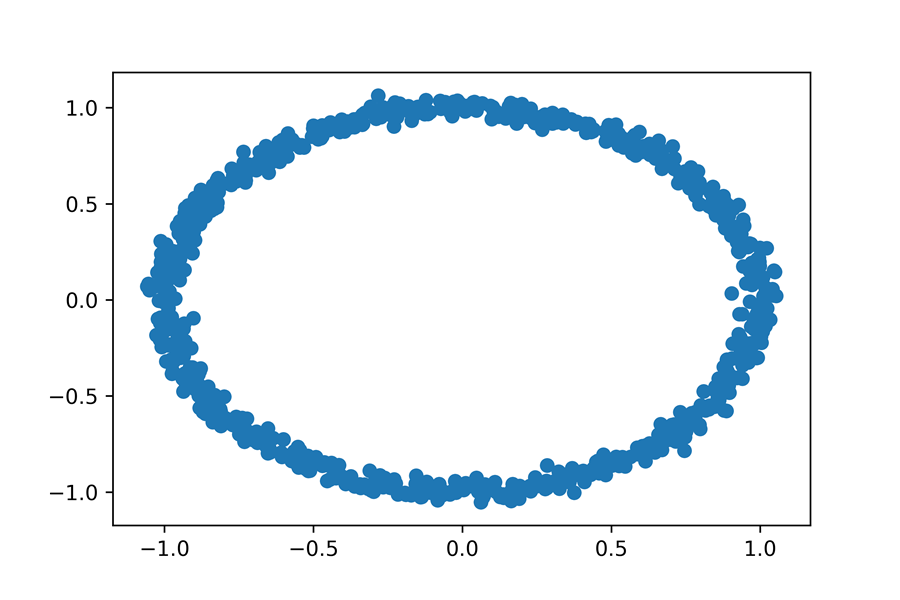
Pandas allows us to obtain a table containing elements from any single cluster. Alternatively, we might want to obtain multiple tables, where each table maps to a cluster id. In Pandas, this can easily be done by calling df.groupby('Cluster'). The groupby method will create 3 tables; one for each cluster. It will return an iterable over the mappings between cluster ids and tables. Lets use the groupby method to iterate over our 3 clusters. We’ll subsequently plot the rocks in cluster 2 and cluster 3, but not the rocks in cluster zero.

>**NOTE**<br>
>Calling `df.groupby('Cluster')` returns more than just an iterable. It returns a DataFrameGroupBy object, which provides additional methods for cluster filtering and analysis.

**This listing Iterating over clusters using Pandas**

In [ ]:
for cluster_id, df_cluster in df.groupby('Cluster'):
    if cluster_id == 0:
        print(f"Skipping over cluster {cluster_id}")
        continue

    print(f"Plotting cluster {cluster_id}")
    plt.scatter(df_cluster.X, df_cluster.Y)


plt.show()

```python
Skipping over cluster 0
Plotting cluster 1
Plotting cluster 2
```
**Figure-10.16. Rocks that fall into clusters 1 and 2**
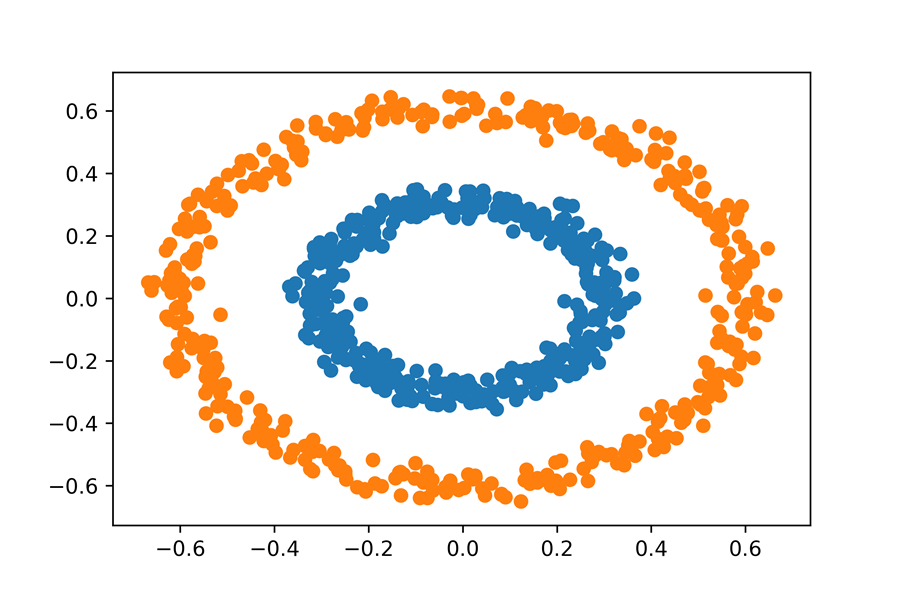

The Pandas `groupby` method lets us iteratively examine different clusters. This could prove useful in our Case Study Three analysis.

***Summary***

* The **K-means** algorithm clusters inputted data by searching for **K centroids**. These centroids represent the mean coordinates of the discovered data groups. K-means is initialized by selecting K random centroids. Each data-point is then clustered based on its nearest centroid. Afterwards, the centroids are iteratively recomputed until they converge on stable locations.
* K-means is guaranteed to converge to a solution. However, that solution might not be the optimal solution.
* K-means requires Euclidean distance to distinguish between points. The algorithm is not intended to cluster non-Euclidean coordinates.
* After executing K-means clustering, we can compute the **inertia** of the result. Inertia equals the sum of the squared distances between each data-point and its closest center.
* Plotting the inertia across a range of K-values will generate an Elbow plot. The elbow component within the elbow-shaped plot should point downwards to a reasonable K-value. Using the **Elbow plot**, we can heuristically select a meaningful K input into K-means.
* The **DBSCAN** algorithm clusters data based on density. Density is defined using the `epsilon` and `min_points` parameters. If a point is located within an `epsilon` distance of `min_point` neighbors, then that point is in a dense region of space. Every neighbor of a point in a dense region of space will also cluster in that space. DBSCAN iteratively expands the boundaries of a dense region of space until a complete cluster is detected.
* Points in non-dense region are not clustered by the DBSCAN algorithm. They are treated as outliers.
* DBSCAN is an advantageous algorithm for clustering data composed of curving and dense shapes.
* DBSCAN can cluster using arbitrary, non-Euclidean distances.
* There is no reliable heuristic for choosing appropriate `epsilon` and `min_points` parameters. However, if we wish to cluster global cities, then we can set the 2 parameters to 250 miles and 3 cities, respectively.
* Storing clustered data in a Pandas table allows us to intuitively iterate over clusters with the `groupby` method.

## Plotting Maps Using Basemap

> excerpt from Data Science Bookcamp: Five Python Projects MEAP V04 livebook | Leonard Apeltsin<br>[go to book](https://livebook.manning.com/book/data-science-bookcamp/chapter-11)

Visualizing geographic data is a common data science task. One external library used to map such data is Basemap; a Matplotlib extension for generating maps in Python. Lets install the Basemap library. Once installation is complete, we will proceed to import the Basemap mapping class. Afterwards, we’ll initialize the class as map_plotter = Basemap().

>**NOTE**<br>
Call `conda install Basemap` from the command-line terminal in order to install the Basemap library.

This listing Initializing the Basemap mapping class
```python
from mpl_toolkits.basemap import Basemap
map_plotter = Basemap()
```
We are ready to visualize the Earth, by plotting the coastline boundaries of all 7 continents. We’ll generate the coastline plot by executing map_plotter.drawcoastlines(). Afterwards, we’ll visualize the plot in Matplotlib, by calling plt.show().

**This listing Visualizing the Earth using Basemap**
```python
fig = plt.figure(figsize=(12, 8))
map_plotter.drawcoastlines()
plt.show()
```
**Figure-11.3. A standard map of the Earth, in which the coastlines of the continents have been plotted.**
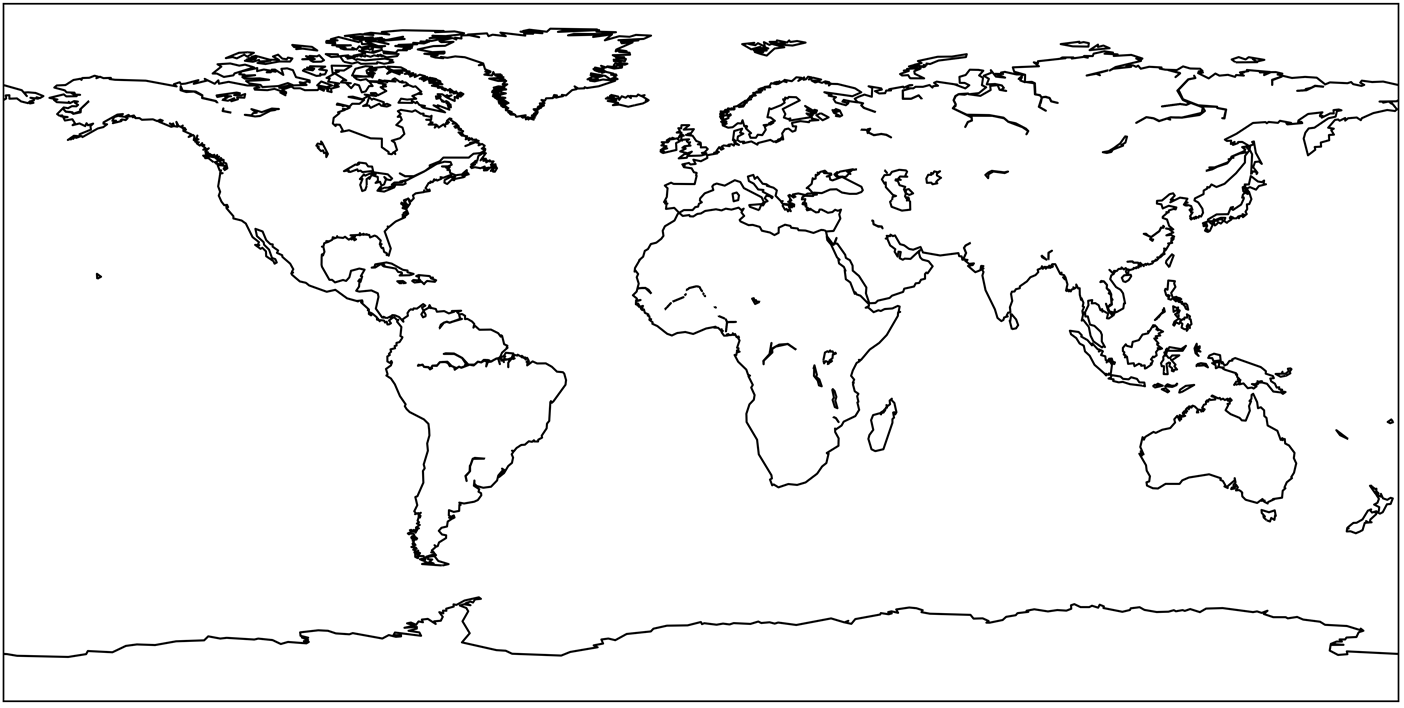
The map uses a standard **Equidistant cylindrical projection**, in which the spherical globe is superimposed on an unrolled cylinder. This is the most popular 2D map representation. Consequently, the `Basemap` class is preset to display geographic data in this manner.

>**NOTE**<br>
We can also manually specify the Equidistant cylindrical crojection while initializing the Basemap class. To do this, we must execute ` map_plotter = Basemap(projection='cyl')`.

Our visualized map is composed of coastal boundaries, which outline all 7 continents. National boundaries are currently missing from the plot. We can incorporate country boundaries by calling the map_plotter.drawcountries() method.

**This listing Mapping coastlines and countries**
```python
fig = plt.figure(figsize=(12, 8))
map_plotter.drawcoastlines()
map_plotter.drawcountries()
plt.show()
```
**Figure-11.4. A standard map of the Earth where coastlines and national boundary lines are present.**
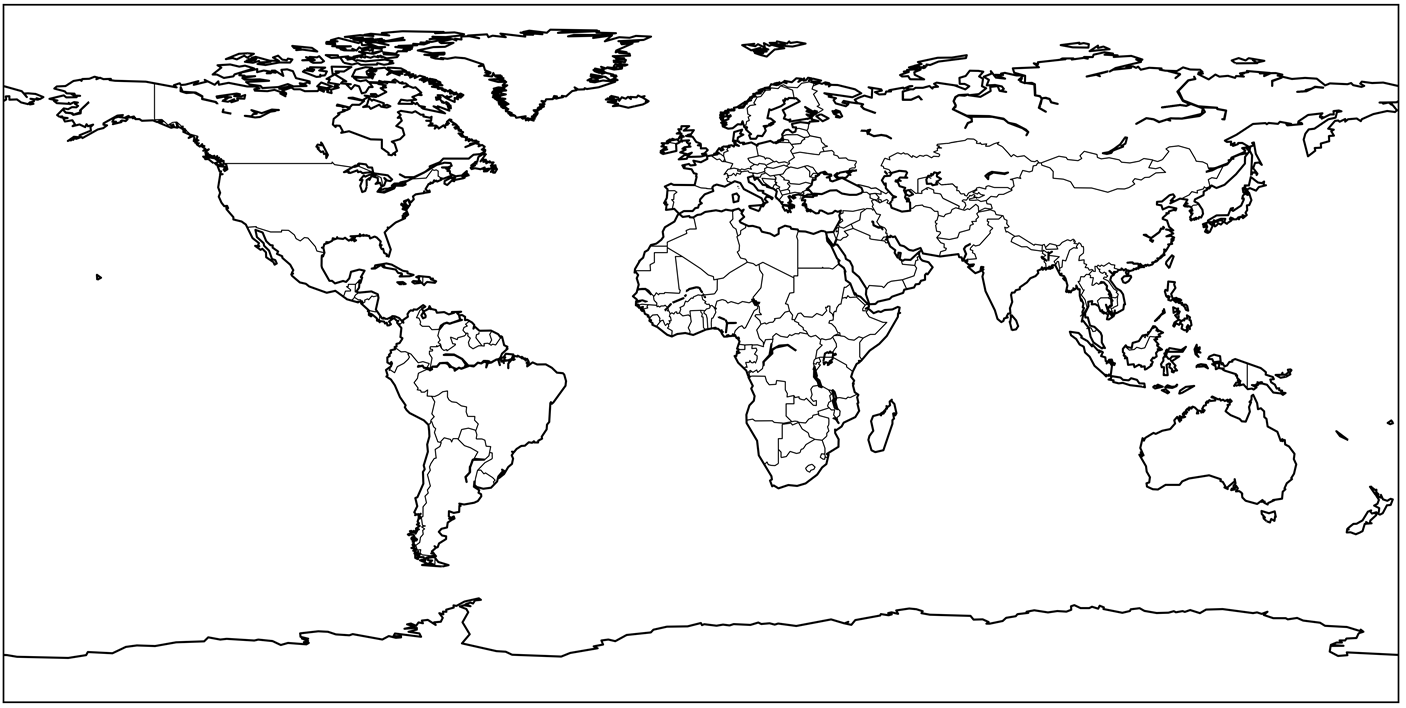
So far our map looks sparse and uninviting. We can improve the quality by calling map_plotter.shadedrelief(). The method-call will color the map using topographic information. Oceans will be colored blue, and forested regions will be colored green.

**This listing Coloring a map of the Earth**
```python
fig = plt.figure(figsize=(12, 8))
map_plotter.shadedrelief()
plt.show()
```
**Figure-11.5. A standard map of the Earth that has been colored to contain oceanographic and topographic details.**
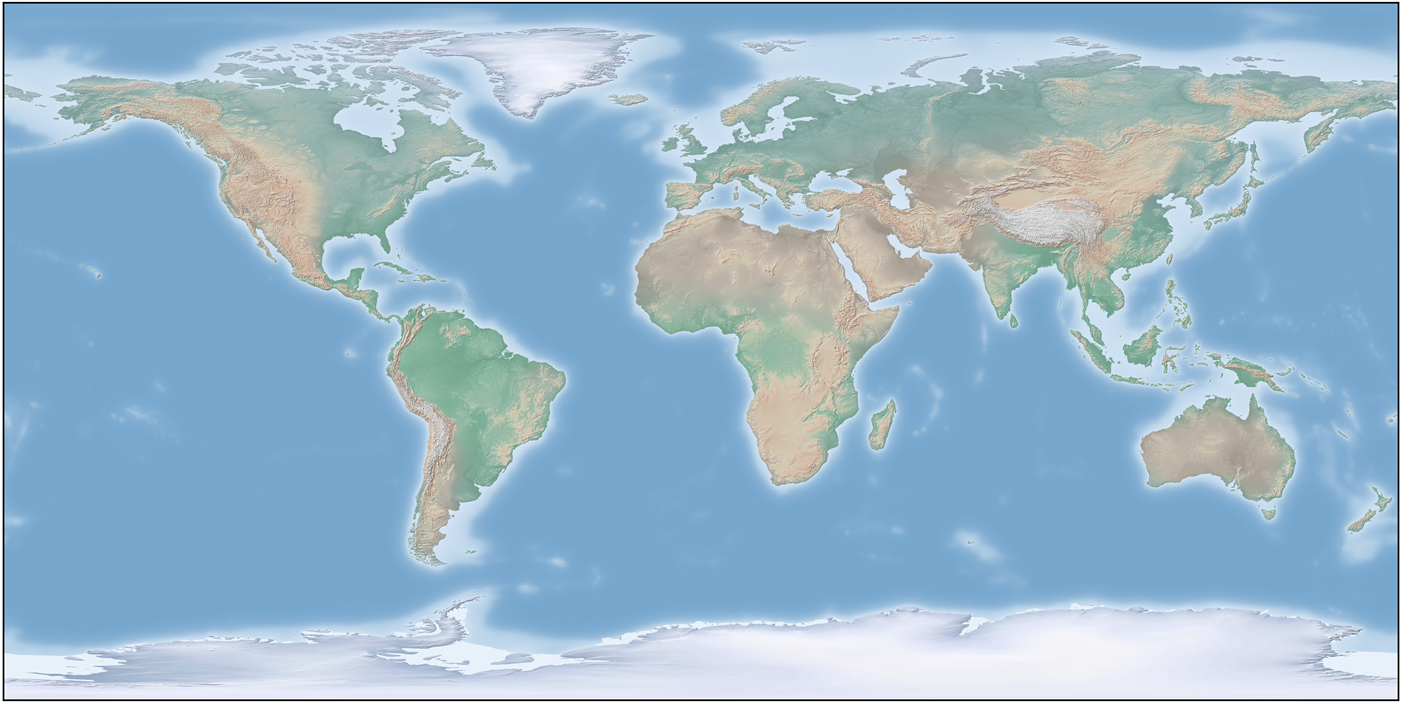

Suppose we are given a list of locations defined by pairs of latitudes and longitudes. We can plot these locations on our map by separating the latitudes from the longitudes and then passing the results into `map_plotter.scatter`.

>**NOTE**<br>
We’ll also need to pass lattlon=True into the map_plotter.scatter method, so that the plotted points are treated as spherical coordinates.

**This listing Plotting coordinates on a map**
```python
fig = plt.figure(figsize=(12, 8))
coordinates = [(39.9526, -75.1652), (37.7749, -122.4194),
               (40.4406, -79.9959), (38.6807, -108.9769),
               (37.8716, -112.2727), (40.7831, -73.9712)]

latitudes, longitudes = np.array(coordinates).T
map_plotter.scatter(longitudes, latitudes, latlon=True)
map_plotter.shadedrelief()
plt.show()
```
**Figure-11.6. A standard map of the Earth with plotted latitude and longitude coordinates.**
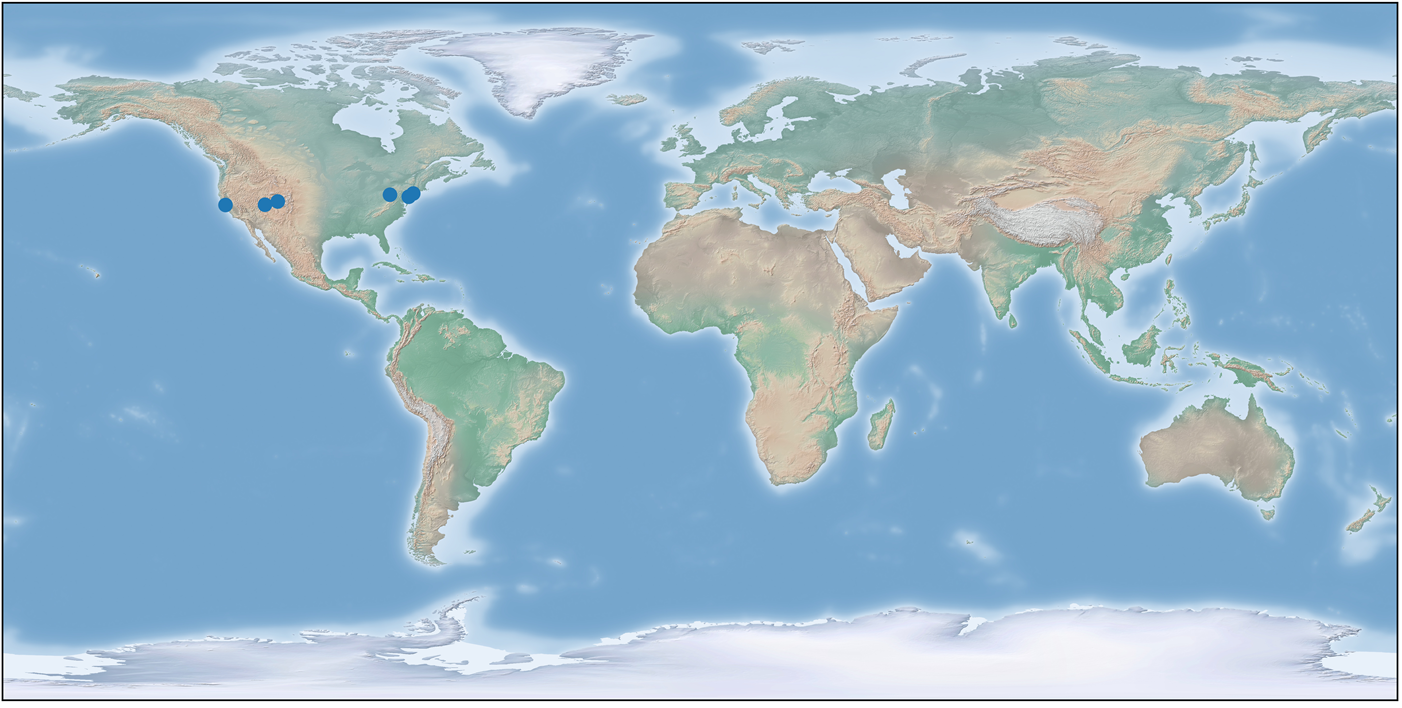
The plotted points all appear within the boundaries of North America. We thusly can simplify the map by zooming in on North America. In order to adjust the map, we must alter our projection. Lets implement an Orthographic projection. This projection plots the Earth from the perspective of a viewer in the outer reaches of the galaxy. The distant observer cannot see the entire Earth, but only a part of it. We’ll center the perspective of the viewer on North America. Specifically, we’ll center their perspective on a latitude and longitude of (40, -95).

We’ll generate the Orthographic projection by initializing the Basecamp class as ` Basemap(projection='ortho', lat_0=40, lon_0=-95). The `projection parameter specifies the projection type, while lat_0 and lon_0 denote the center of the projected perspective. We’ll use our new mapping object to plot coordinates within North America.

**This listing Plotting North American Coordinates**
```python
fig = plt.figure(figsize=(12, 8))
map_ortho = Basemap(projection='ortho', lat_0=40, lon_0=-95)
map_ortho.scatter(longitudes, latitudes, latlon=True,
                  s=70)
map_ortho.drawcoastlines()
plt.show()
```

**An Orthographic projection of North America with plotted latitude and longitude coordinates.**

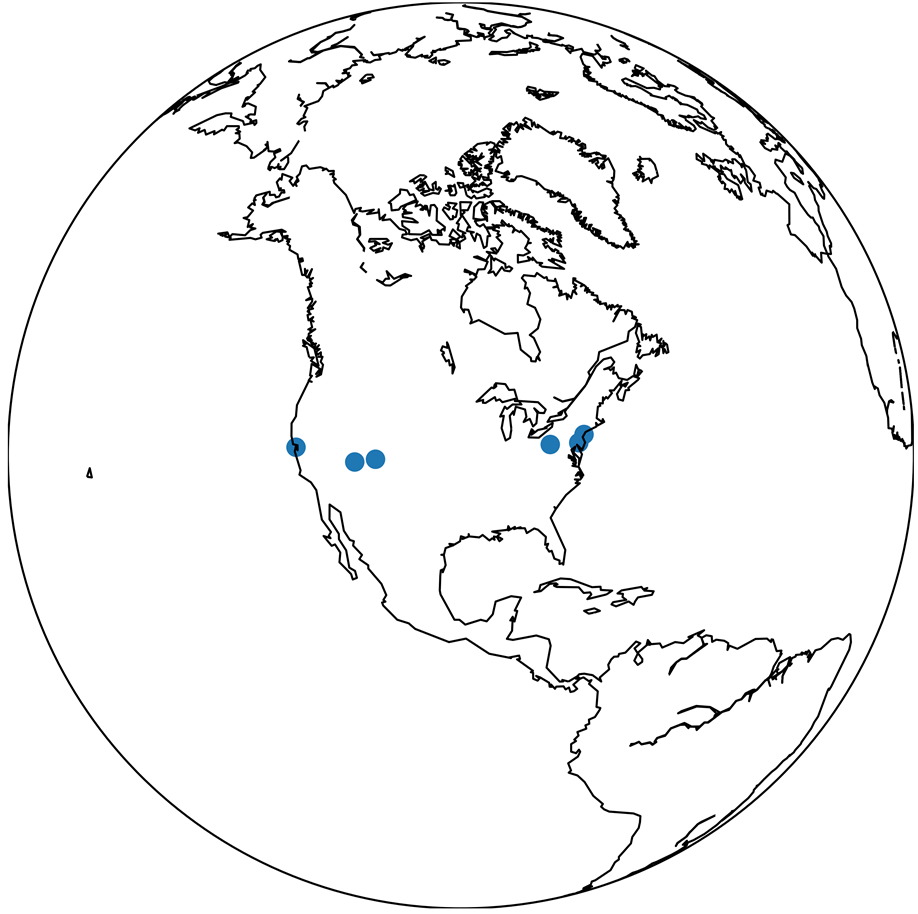

We successfully zoomed in on North America. Now, we’ll zoom in further, onto the United States. Unfortunately, the Orthographic projection will prove insufficient for this purpose. Instead, we will on rely on the Lambart conformal conic projection, (more commonly called the LCC). By setting our projection parameter to equal 'lcc', we can create a 2D map of the United States. Additional parameters will also be required to execute the projection properly. These supplementary parameters are present in the code below, which plots coordinates on the zoomed United States.

> **NOTE**<br>
We need all these parameters because the LCC is a complex, multi-step procedure. Initially, the projection places a cone on-top of the spherical Earth. The cone’s circular base covers the region we intend to map. Afterwards, coordinates in the region are projected onto the surface of the cone. Finally, the cone is unrolled to create a 2D map. This process requires many fine-tuned parameters to execute appropriately. The functionality of the parameters is beyond the scope of this section.

**This listing Plotting USA Coordinates**

```python
fig = plt.figure(figsize=(12, 8))
map_lcc = Basemap(projection='lcc', lon_0=-95, llcrnrlon=-119,
                  llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49, lat_1=33,
                  lat_2=45)

map_lcc.scatter(longitudes, latitudes, latlon=True, s=70)
map_lcc.drawcoastlines()
plt.show()
```

**An LCC projection of the United States with plotted latitude and longitude coordinates.**
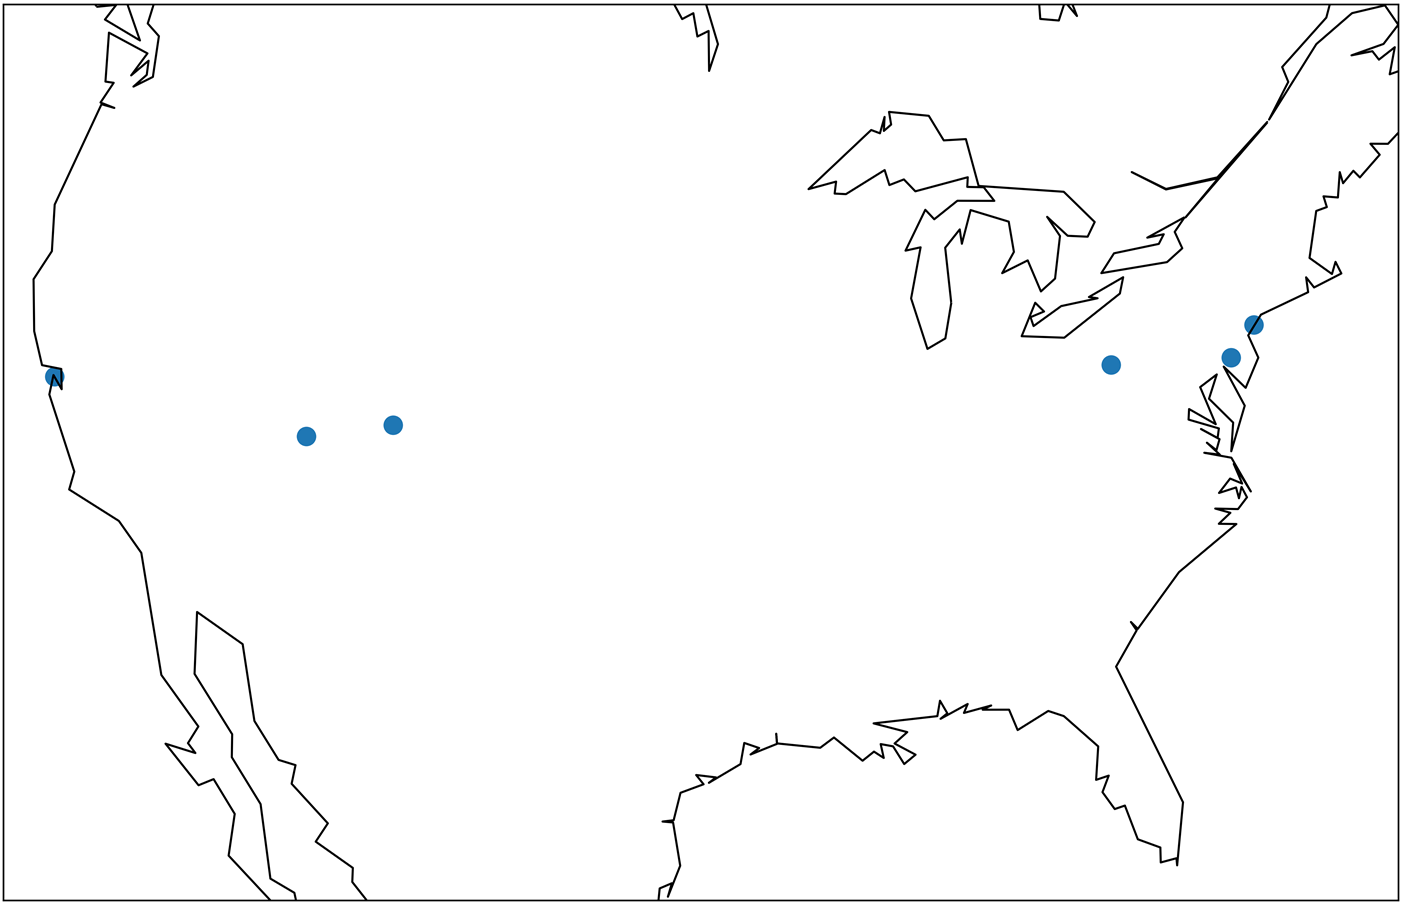

Our map of the United States is looking a little sparse. Lets add state boundaries to the map by calling map_lcc.drawstates().

**This listing Mapping state boundaries in the USA**
```python
fig = plt.figure(figsize=(12, 8))
map_lcc.scatter(longitudes, latitudes, latlon=True, s=70)
map_lcc.drawcoastlines()
map_lcc.drawstates()
plt.show()
```
**An LCC projection of the United States where state boundaries are present..**
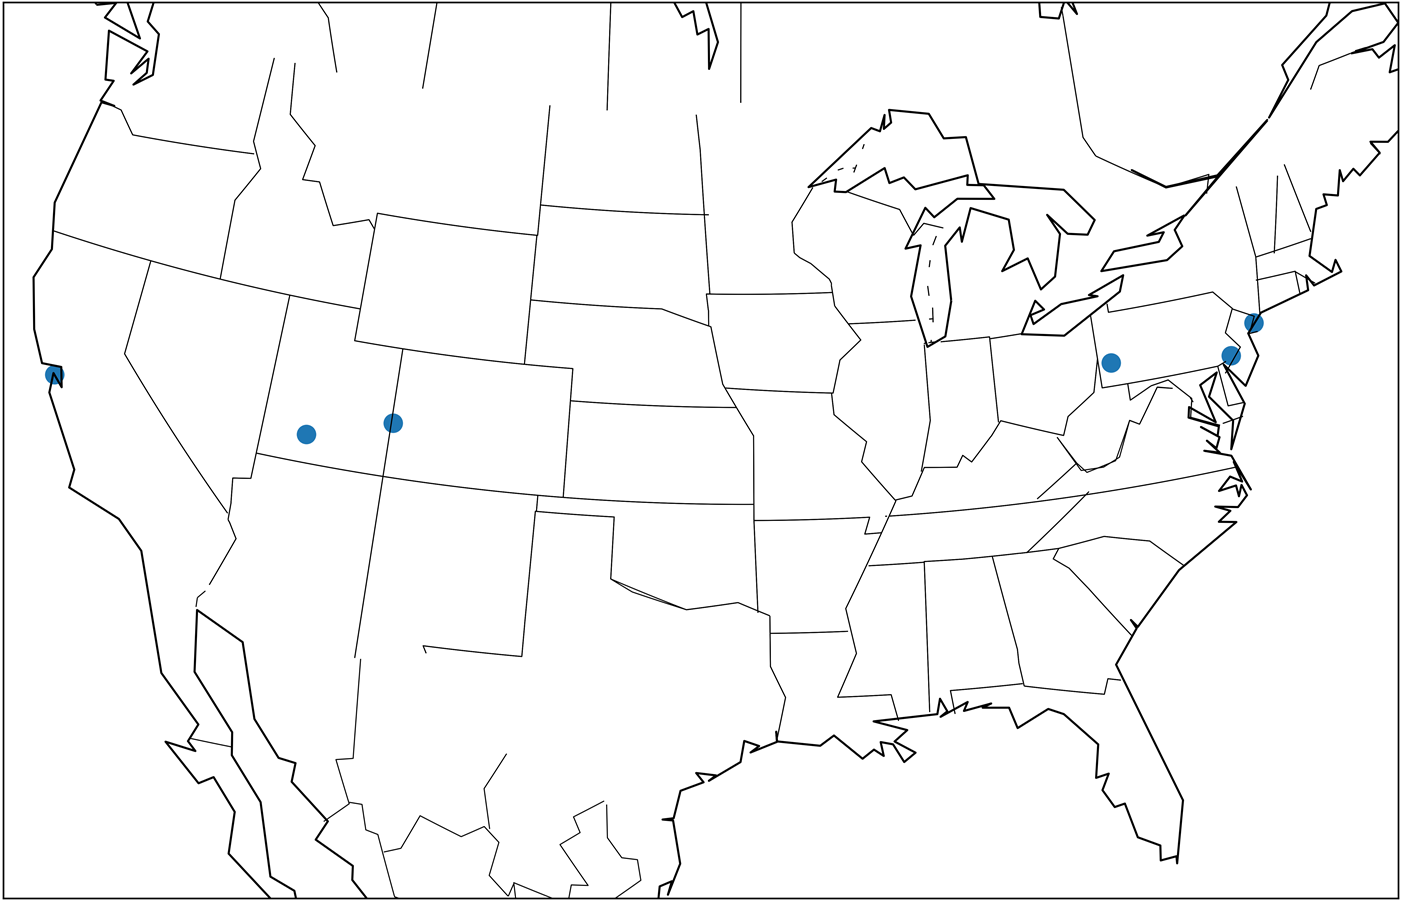

**Common Basemap methods**
```python
map_plotter = Basemap()#: Creates a Basemap object for generating maps using an Equidistant cylindrical projection.

map_plotter = Basemap(projection='cyl')#: Creates a Basemap where the Equidistant cylindrical projection is set explicitly.

map_plotter.drawcoastlines()#: Plots continental coastlines on a map.

map_plotter.drawcountries()#: Plots national boundaries on a map.

map_plotter.shadedrelief()#: Colors a plotted map, using topographic information.

map_plotter.scatter(longitudes, latitudes, latlon=True)#: Plots latitude and longitude coordinates on a map.

map_ortho = Basemap(projection='ortho', lat_0=lat, lon_0=lon)#: Creates a Basemap object for generating maps using an Orthographic projection. The projection’s perspective is centered on lat and lon.

map_ortho = Basemap(projection='ortho', lat_0=40, lon_0=-95)#: Creates a Basemap object for generating a map of North America using an Orthographic projection.

map_lcc = Basemap(projection='lcc', lon_0=-95, llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49, lat_1=33, lat_2=45)#: Creates a Basemap object for generating a map of the United States using a Lambart conformal conic projection.

map_lcc.drawstates()#: Plots US state boundaries on a map.
```
Basemap allows us to plot any location on a map. All we need is the location’s latitude and longitude. Of course, we must first know these geographic coordinates prior to plotting them on a map. Thus, we need a mapping between location names and their geographic properties. That mapping is provided by the `GeoNamesCache` location-tracking library.



## **Submit Your Work**

The deliverable from this section is another Jupyter Notebook documenting your work as you cluster the headlines with the coordinates and produce a world map with clustered headlines. The map should show the locations of headlines colored by the cluster assignment. We will use this DataFrame and map to find disease outbreaks in the next section. A sample of the DataFrame showing the structure and content is below along with a partial map view:


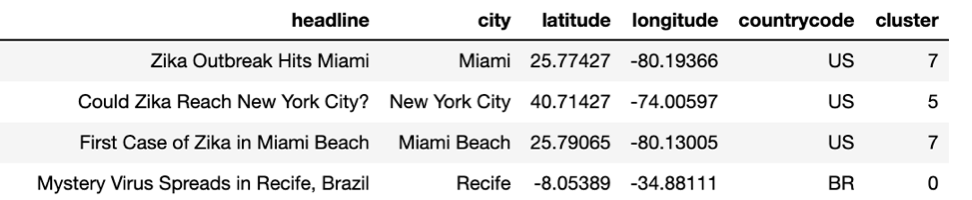
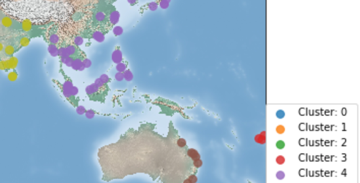


Upload a link to your Jupyter Notebook (preferably hosted on GitHub) in the blank below and hit submit. After submitting, you can view an example solution in the next section.